# Glass Identification Project

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. 
The dataset was credited to Vina Spiehler in 1987. 
The study of classification of types of glass was motivated by criminological investigation. 
At the scene of the crime, the glass left can be used as evidence...
if it is correctly identified!


The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


	1- building_windows_float_processed
	2- building_windows_non_float_processed
	3- vehicle_windows_float_processed
	4- vehicle_windows_non_float_processed (none in this database)
	5- containers
	6- tableware
	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict Type of Glass

### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =15
plt.rcParams['font.size']=15


#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='#D3F8D3'

### Import the Data set

In [4]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', header=None)
glass

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
#Lets check head of the DataFrame retrieved using glass.head()
glass.head(6)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
#Lets check tail of the DataFrame retrieved using glass.tail()
glass.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

## Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

In [7]:
#Let's check the dimensions of the data set using shape 
glass.shape

(214, 11)

The Dataset contains 214 rows and 11 columns containing various values corresponding to the data

In [8]:
#Let's check the names of the Columns for later usage
glass.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

Since the column names are like numbers, we can not understand the meaning of each value.
so, let us go for naming the columns as per the information given in the project description

#### Modifying the names of the columns as per the description

In [9]:
#Modifying the names of the columns as per the description
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_Glass']
glass.columns = names
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
#Now Let's check the names of the Columns for with modified details
glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_Glass'],
      dtype='object')

In [12]:
#checking the dimensions of the internet 
glass.columns.tolist()

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_Glass']

Just representing the names of the columns as a single list

In [13]:
#Let's check the data types of the columns
glass.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Type_Glass      int64
dtype: object

We can observe that out of all the columns, ID and Type of the glass are of INT64 data type because they specify the ID number and Type of the Glass.
But remaining all Chemical component combination values are in the FLOAT64 Data types.
Whereas we can ignore or drop the ID COlumn, because it doesn't support any information except as Serial Number

### Checking the Null Values

In [14]:
#Checking the Null Values
glass.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Type_Glass    0
dtype: int64

We can observe that there are no null values in any of the columns.
Similarly lets confirm the same by using total count of null values

In [15]:
#Check the Sum of NULL Values in the total DataFrame
glass.isnull().sum().sum()

0

It's very clear that there are no Null values in any of the columns or totally within the data set.

#### Get the Complete Information about Dataset

In [16]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Type_Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


We have already looked at the information and NULL values earlier and this is a simple way to reiterate and check the information clearly.

We can see that, there are 9 columns of the features are floats, 2 are of integers. The dataset has 214 values and 10 features + the target variable (Type of the Glass). Memory Size is about 18.5+ KB

<Axes: >

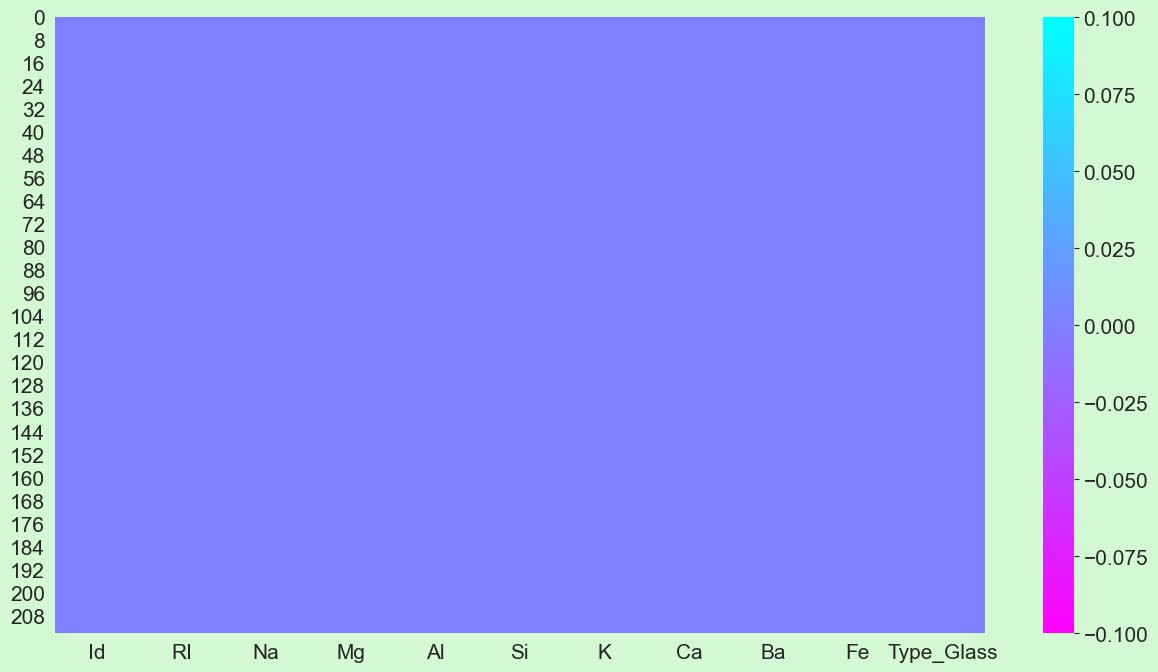

In [19]:
#Let's see the confirmation of No NULL Values with a heatmap
sns.heatmap(glass.isnull(), cmap='cool_r')

From the Heatmap also, it's very clearly that, there are no NULL Values in the given data set. Hence no need of replacement or any other problems related with the NULL Value handling

###  Let's check the unique values and all the information in each column

In [20]:
#Gives Unique Values
glass['Type_Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

there are 6 different types of Unique values are there in our target variable. which referes to 6 different types of glass predictions are availble. Among them we need to classify based on different factors.

In [22]:
#Gives Unique Values
glass['Type_Glass'].nunique()

6

We can again conclude that there are totally 6 different classes are available within the Target variable

In [23]:
#Checking the value counts of each Column
for i in glass.columns:
    print(glass[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

We can observe that, the column ID has all the unique values simply representing a serial numbers and we can drop it as there's no role of  it in predicting the type of glass.

All the other chemical components has different lengths and many unique values. but each value corresponds in a different way.

The column Type_Glass is having 6 different unique values, where type 2 are of 76 combinations, and similarly all other types have different lengths.
type 6 has less unique values compared to others.

In [26]:
#Let's implement describe to return the description of the data in the DataFrame
gd=glass.describe()
gd

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Since, the describe() method is used to return the description of the data in the given Dataset, we use it to find out the description of Numerical data which gives the final conclusion and information as follows in the each column

1) COUNT: The Counts of all coulmns are same, which shows no data is missed.

2) MEAN: If the Mean Value is greater than the Median(50%), it results in right skewness

3) If mean is lesser than median results in Left Skewness

4) The large variation in mean and 75% results in a possibility of outliers, which we will handled later.

5) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

In [50]:
#Lets compare the columns of MEAN and MEDIAN for skew information
gd.iloc[[1,5]]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
mean,107.5,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
50%,107.5,1.517680,13.30000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000


We know that ID and Type_Glass can be ignored for any analysis since, ID is corrsponding to Serial Number and can be dropped later.

Type of Glass is a target varaiable and no need to find or remove skewness or outliers.

Columns, RI, Na are almost having similar mean and median so we can think of no skewness
in Mg and K mean is less than Median and we can observe it as Left SKewed
other columns showing right skewness.
The same can also be identified by the .skew() method

In [51]:
#Lets compare the columns of MEAN and MEDIAN for skew information
gd.iloc[[1,6]]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
mean,107.50,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
75%,160.75,1.519157,13.82500,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000


Except in Ba and Fe, all the other columns are not having a large variation between Mean and 75% Values. SO only these 
two columns maybe having Outliers. 
We will check them later and handle it if necessary

### We can also see actually what % of data is missed

In [54]:
# We know there's no null values, but lets see the %
total = glass.isnull().sum().sort_values(ascending=False)
percent_1 = glass.isnull().sum()/glass.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Id,0,0.0
RI,0,0.0
Na,0,0.0
Mg,0,0.0
Al,0,0.0
Si,0,0.0
K,0,0.0
Ca,0,0.0
Ba,0,0.0
Fe,0,0.0


We can once again see the zero NULL Values in the form of Percentage

In [56]:
# recognizing which column is continuous and which is categorical
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
glass.nunique()

Id            214
RI            178
Na            142
Mg             94
Al            118
Si            133
K              65
Ca            143
Ba             34
Fe             32
Type_Glass      6
dtype: int64

In the above method, we can categorize that out of 214 columns all the Variables are having more different unique Values.
so we can say that all are having Numerical Data and we can even see from dtypes also

In [59]:
glass = glass.drop('Id',1)

In [60]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Graphical Analysis

1. Univariant Graphical Analysis

In [61]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type_Glass']

X = glass[features]

y = glass[label]

<Axes: title={'center': 'Total Count of Glass Types'}, xlabel='Type_Glass', ylabel='Count'>

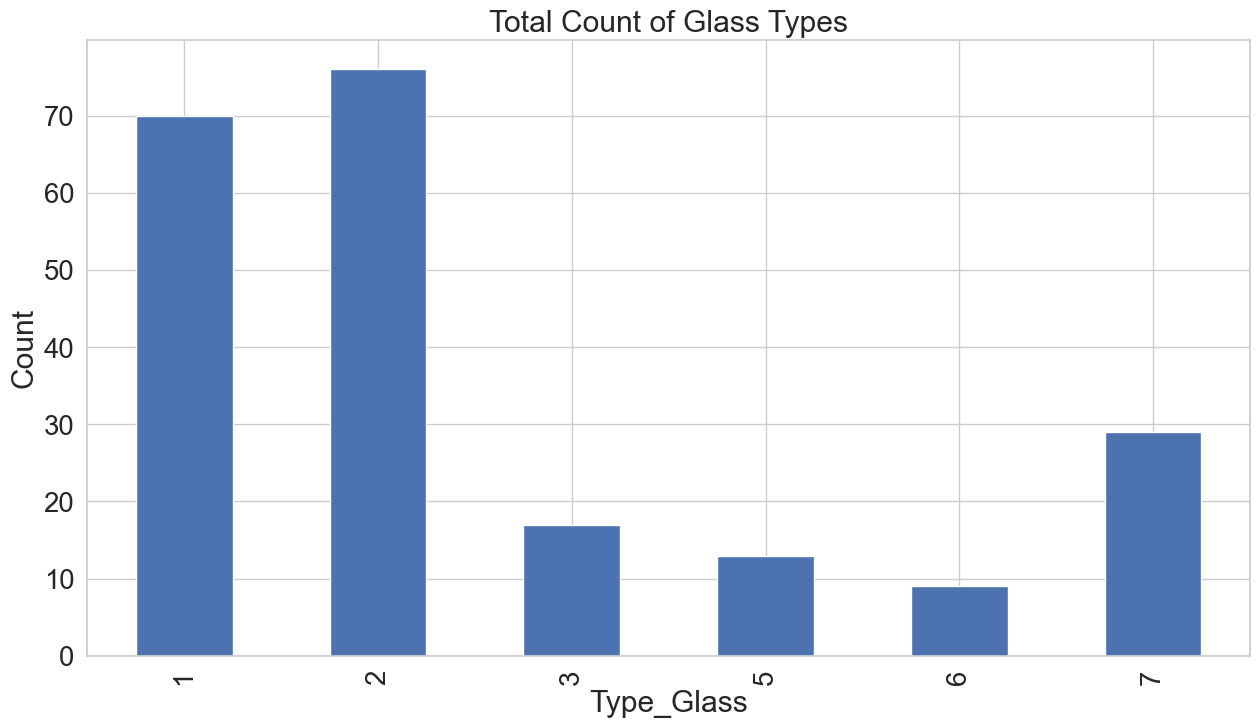

In [72]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
plt.rcParams['figure.figsize']=(15,8)
plt.title('Total Count of Glass Types')
Group_data=glass.groupby('Type_Glass').size()
plt.ylabel('Count')
Group_data.plot(kind='bar')

<Axes: title={'center': 'Total Count of Glass Types'}, xlabel='Type_Glass', ylabel='count'>

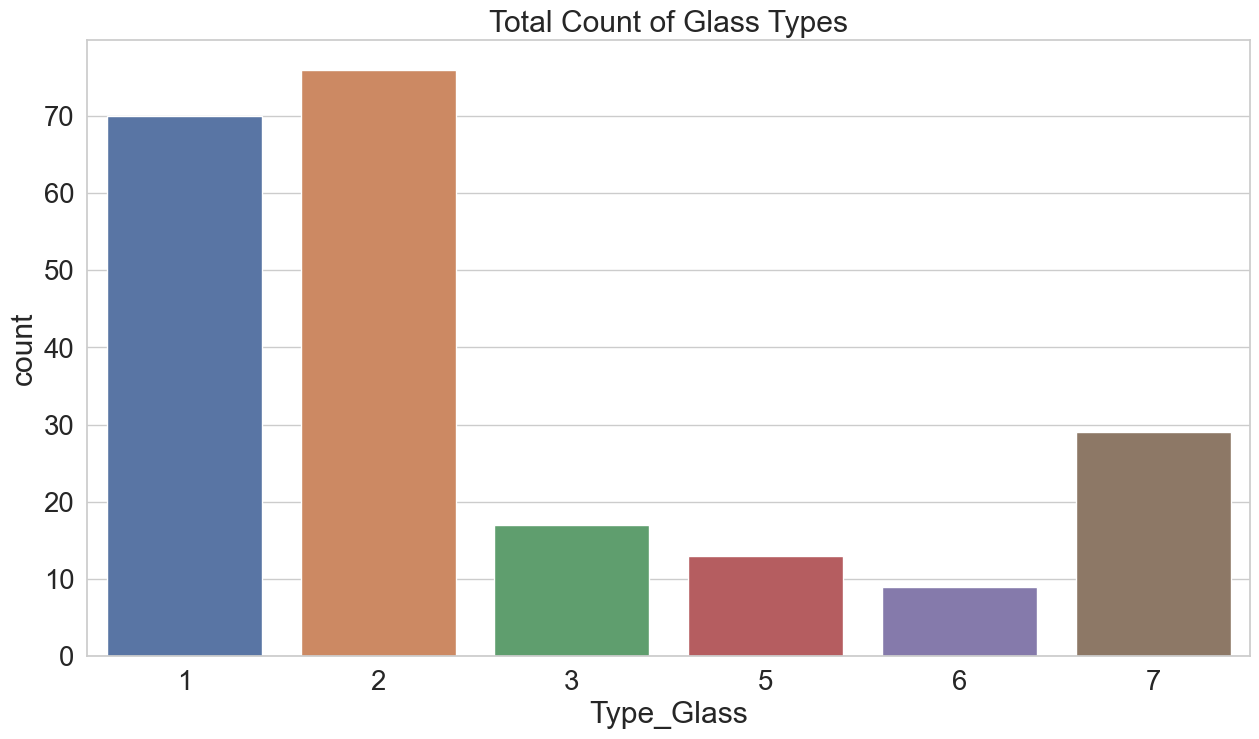

In [71]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Total Count of Glass Types')
sns.countplot('Type_Glass',data=glass)

We Have Seen the count of total Glass types in both BAR and COUNT Plots.

Since Types 2 and 1 appear most frequently in the dataset, we must ensure that all of the types are fairly represented in the train and test datasets.

The forensic sciences department's dataset is the source, and it's likely that the high number of type 1 and type 2 crimes is due to the fact that many offenders shatter building window panes at the scene rather than breaking bottles or dinnerware.

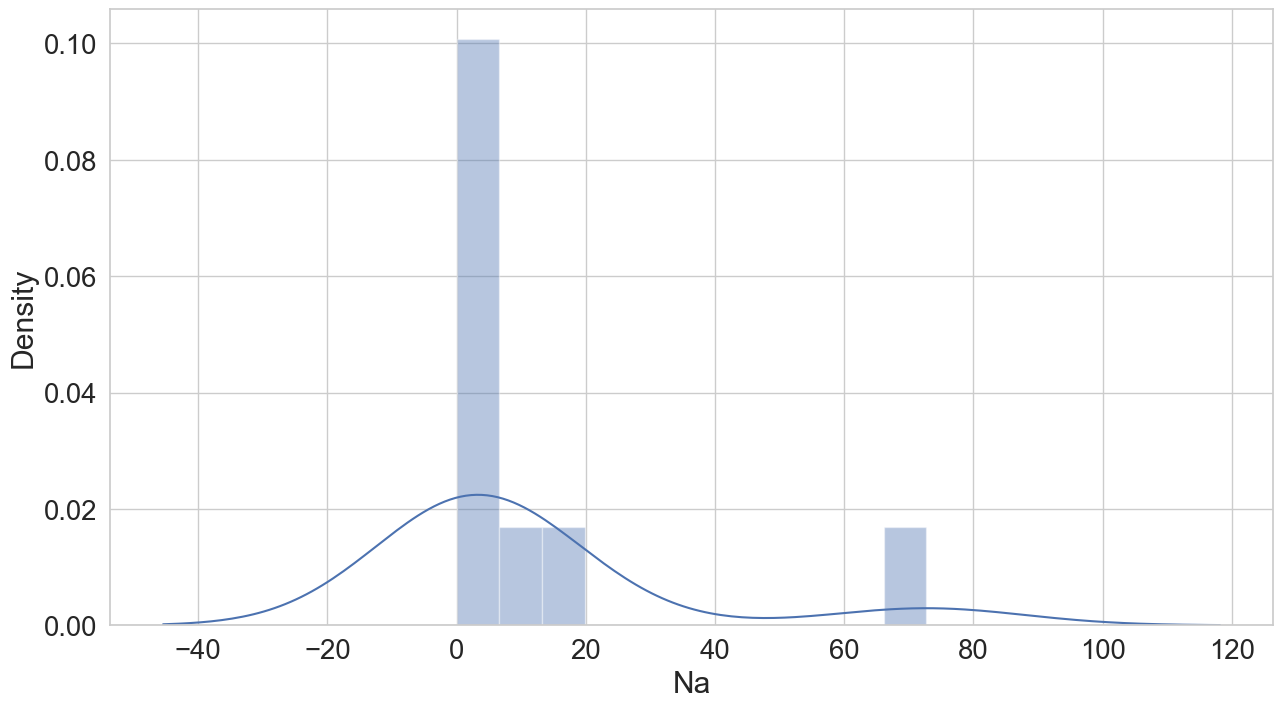

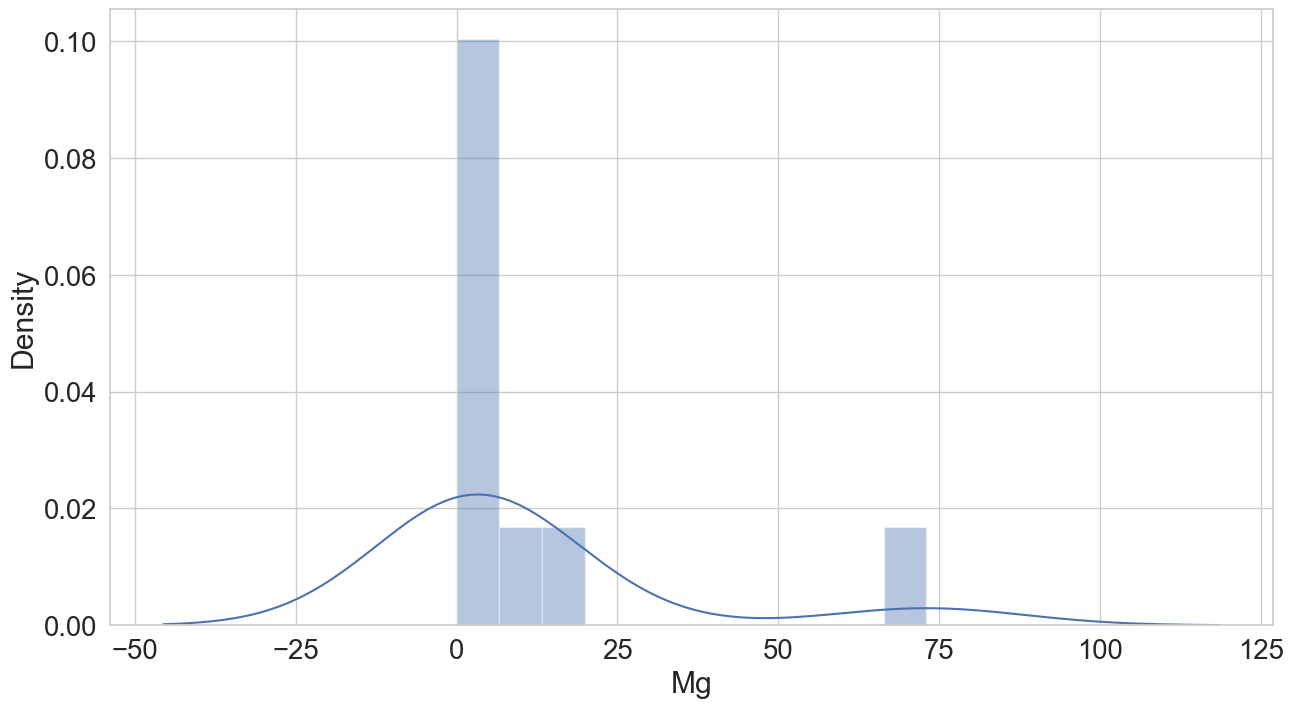

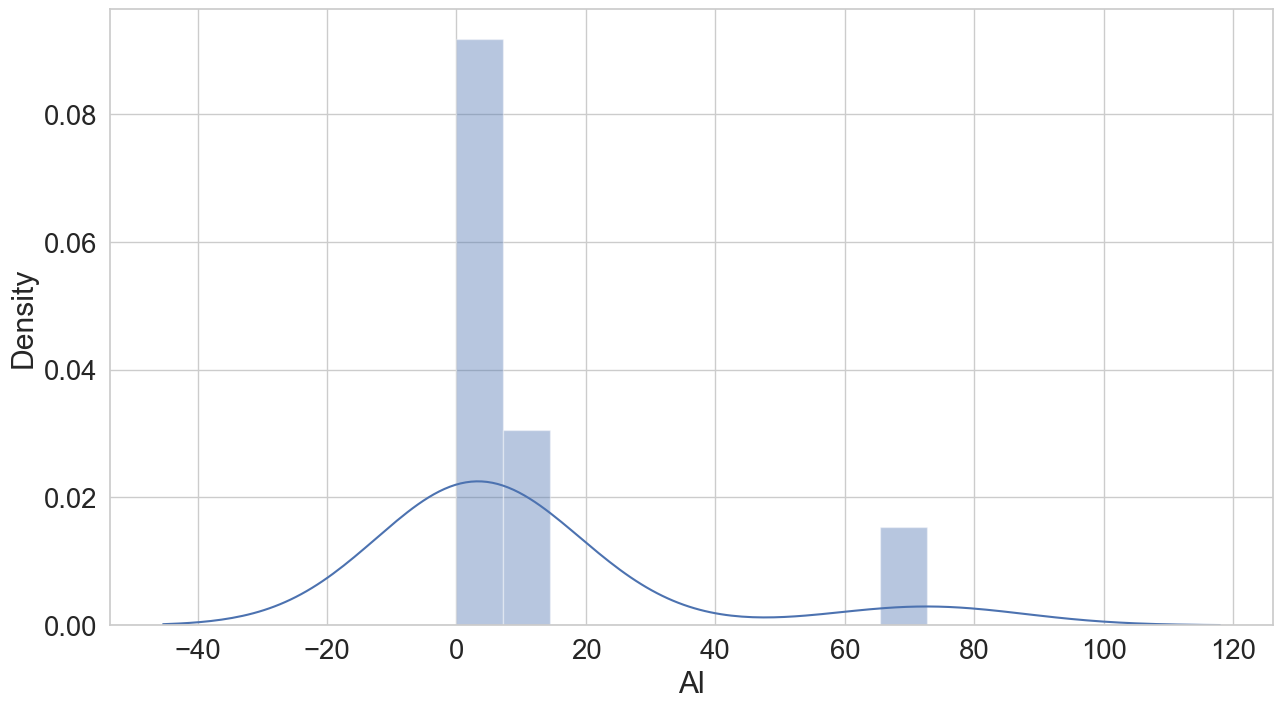

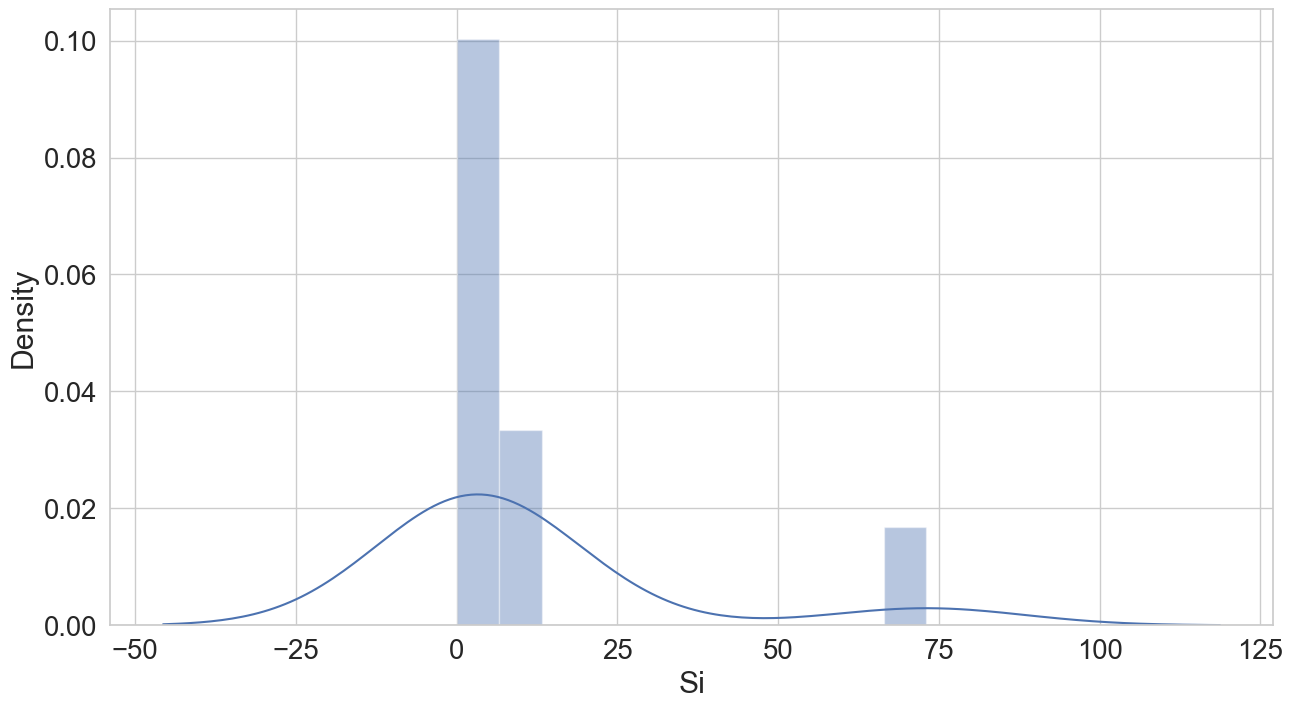

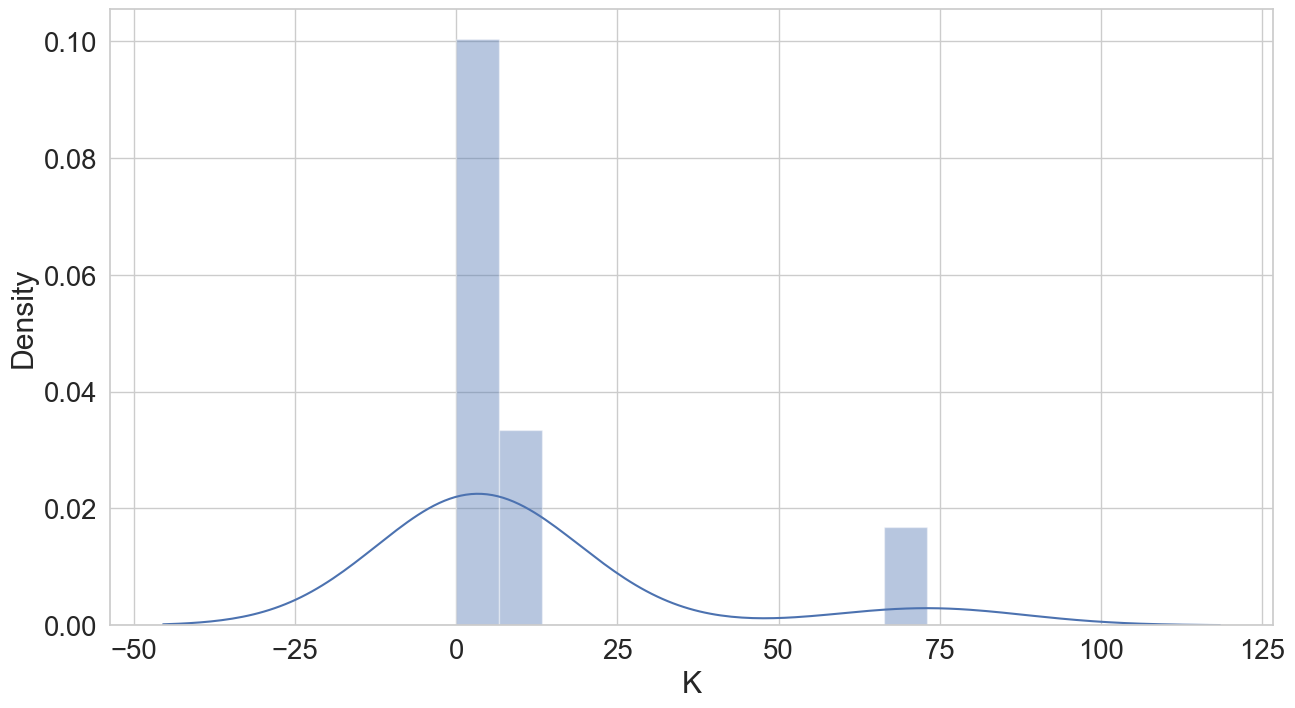

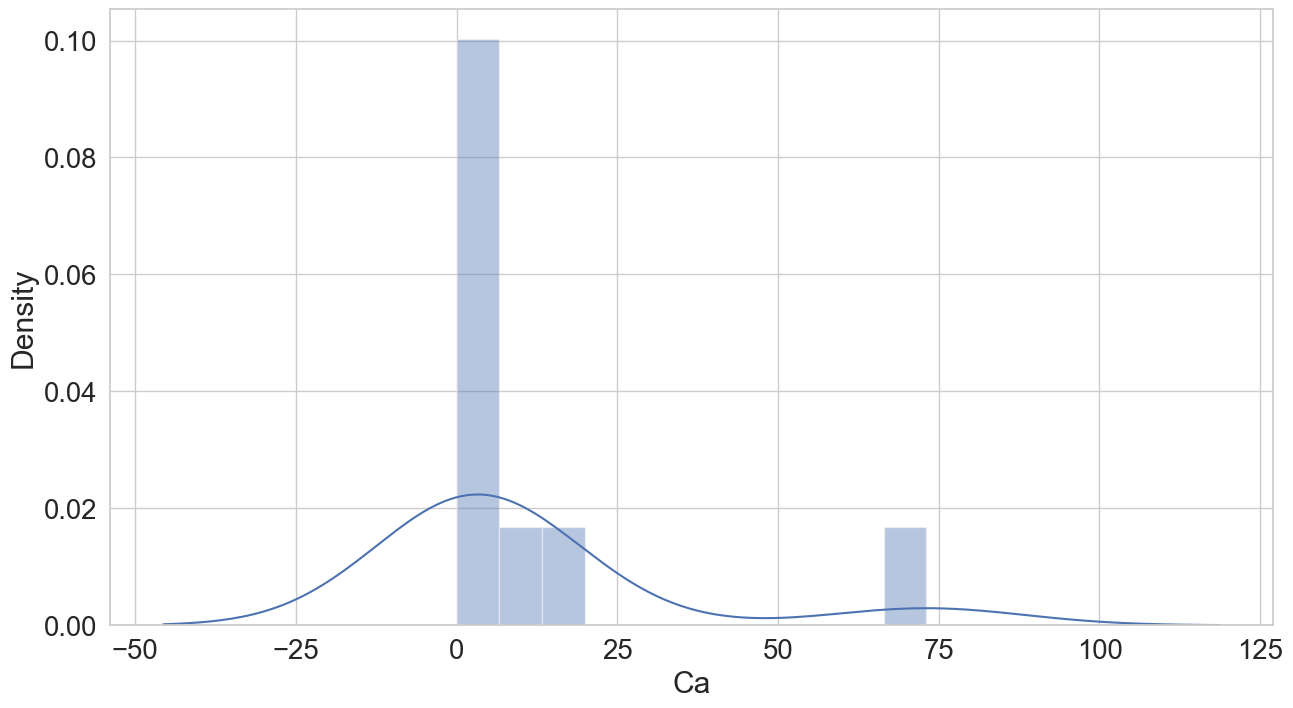

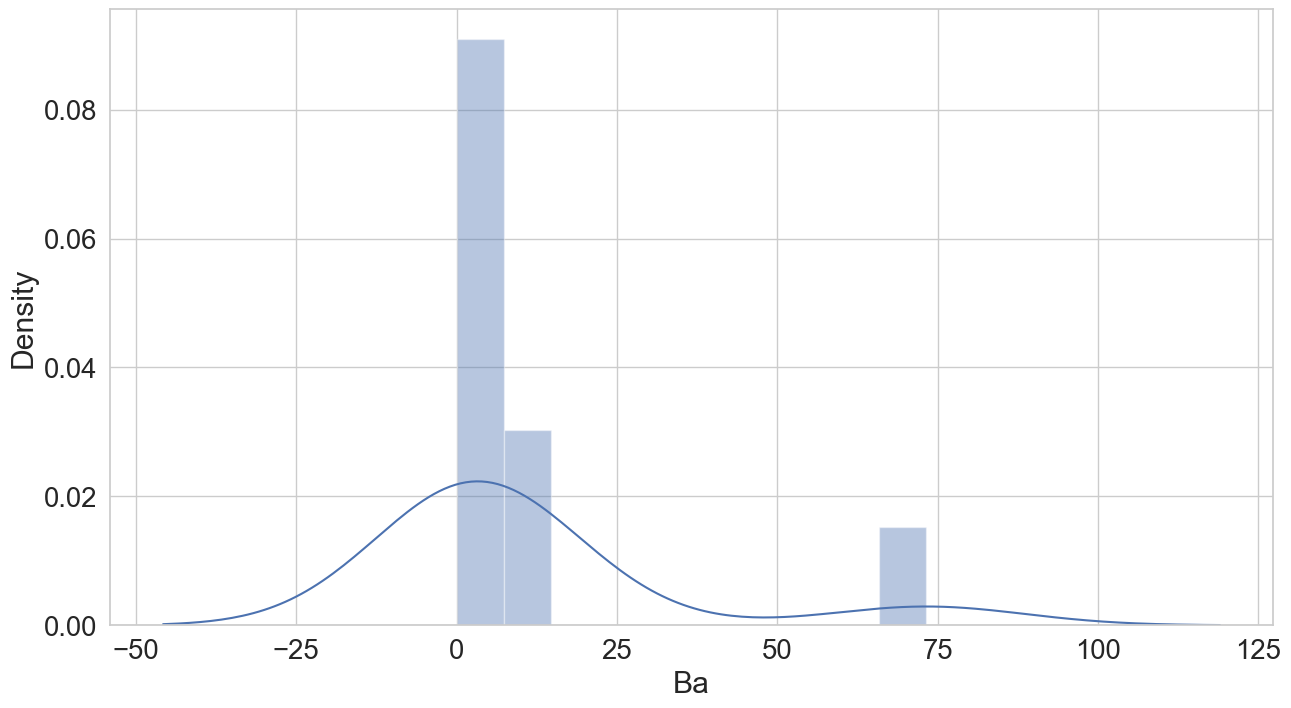

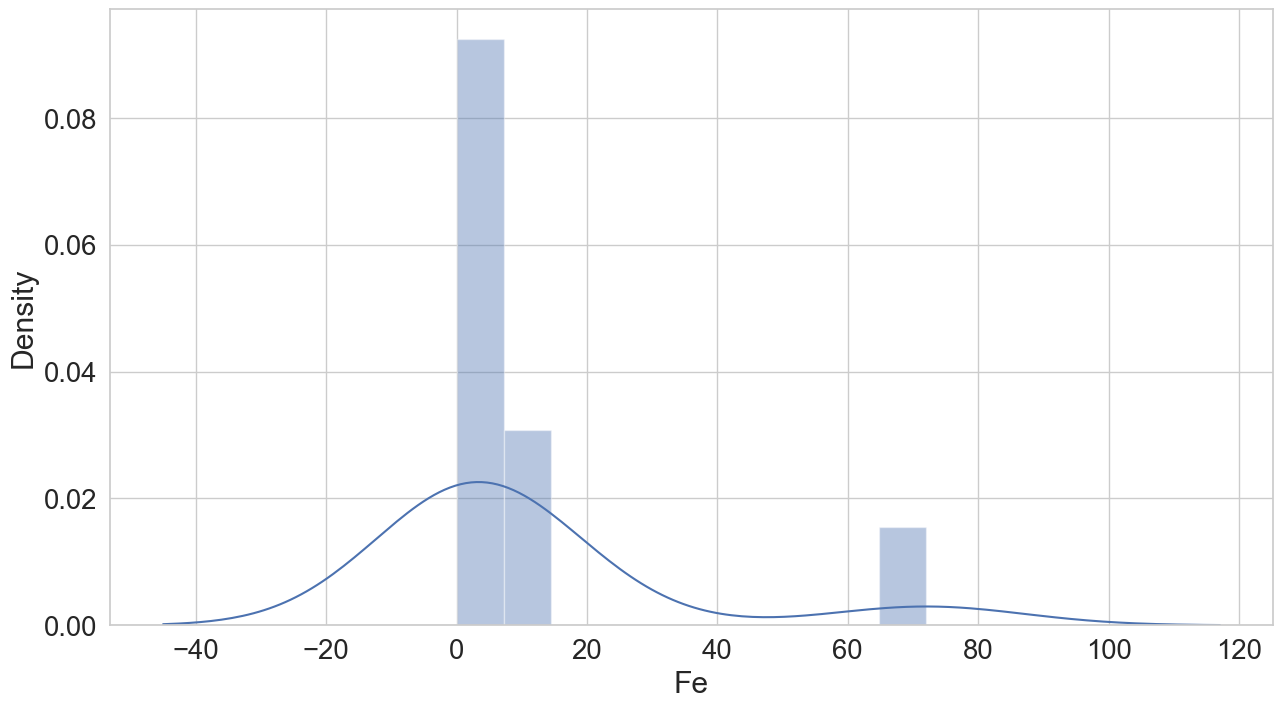

In [76]:
x2 = X.values
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

Through above distplot, we could simply able to plot the count values in each column as graphical representataion

We can also find that our dataset is skewed either on positive side or negative side and data is not normalized

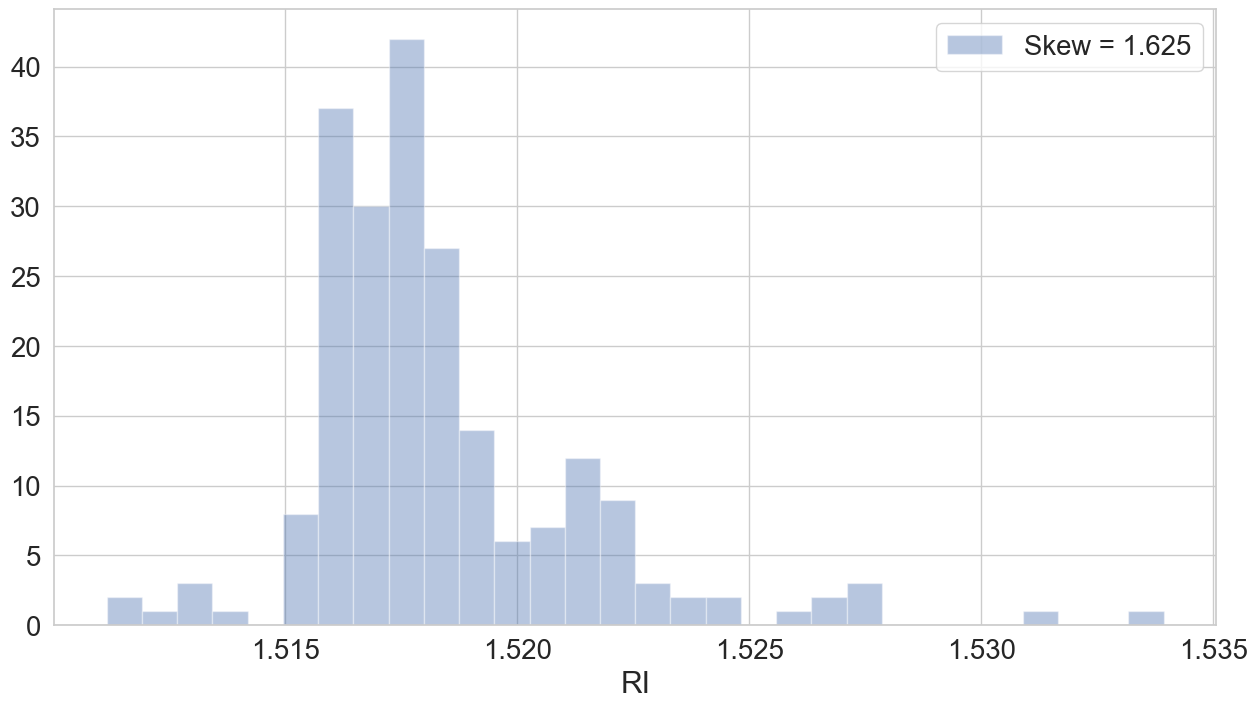

1.6254305060087644


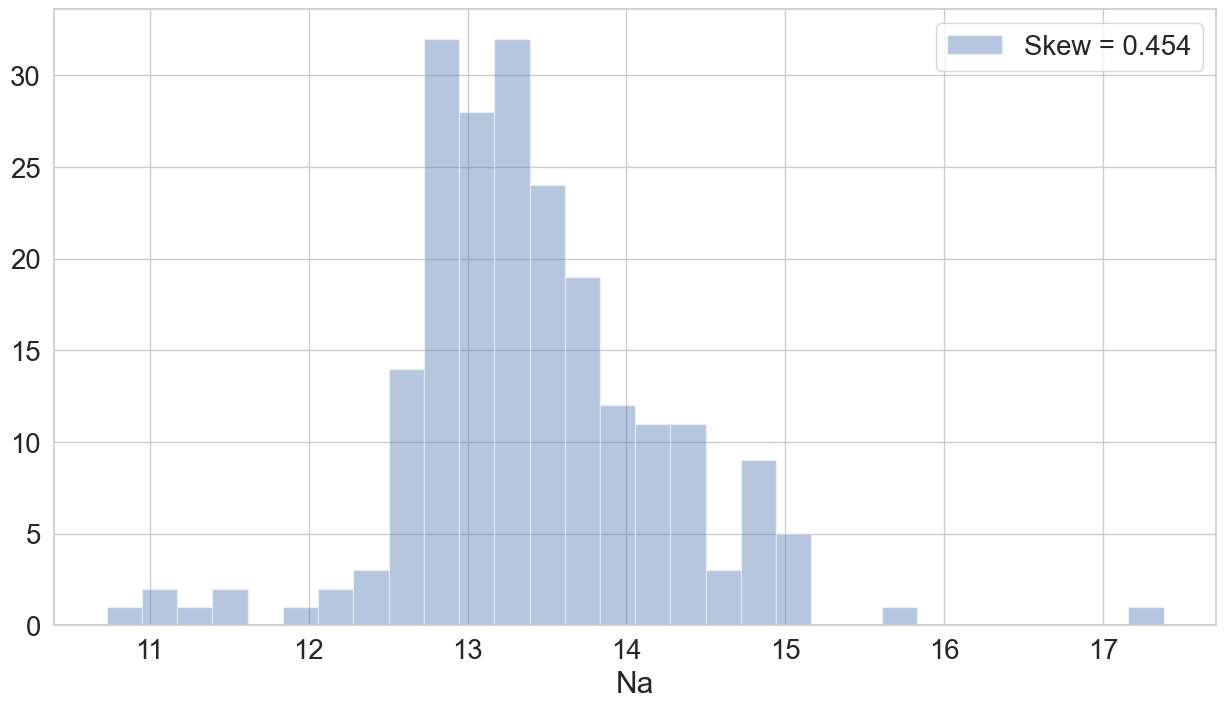

0.4541814536577495


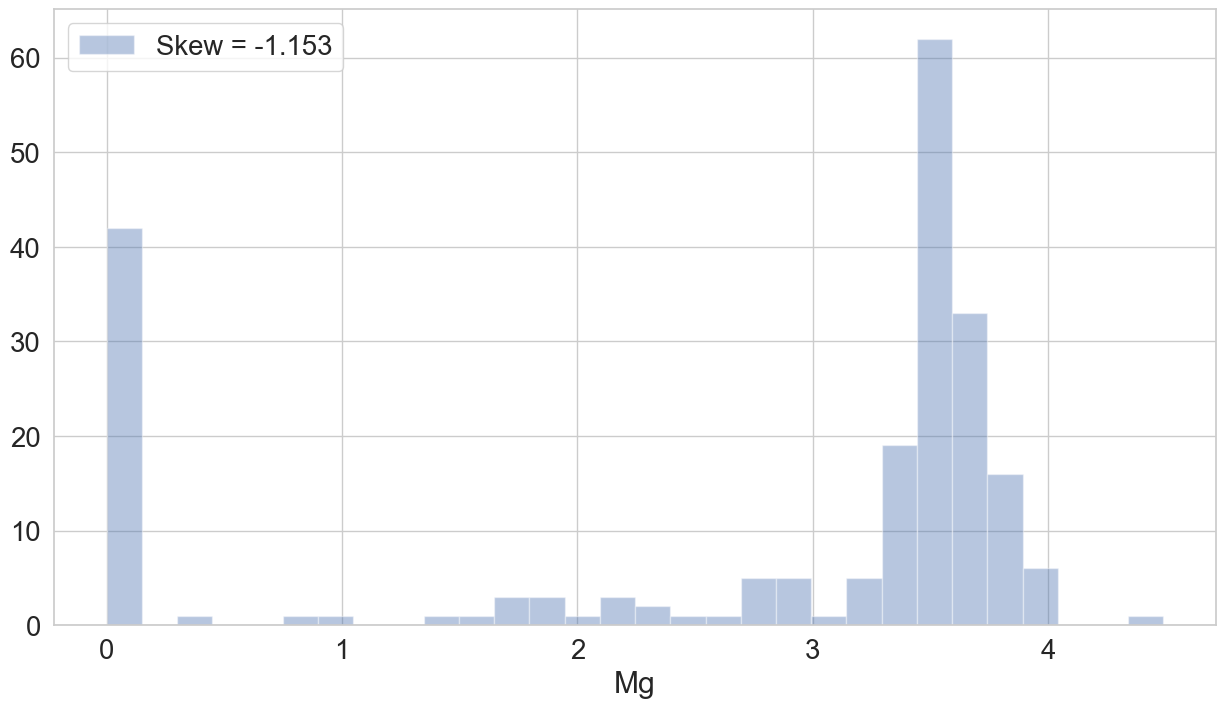

-1.1525593175802356


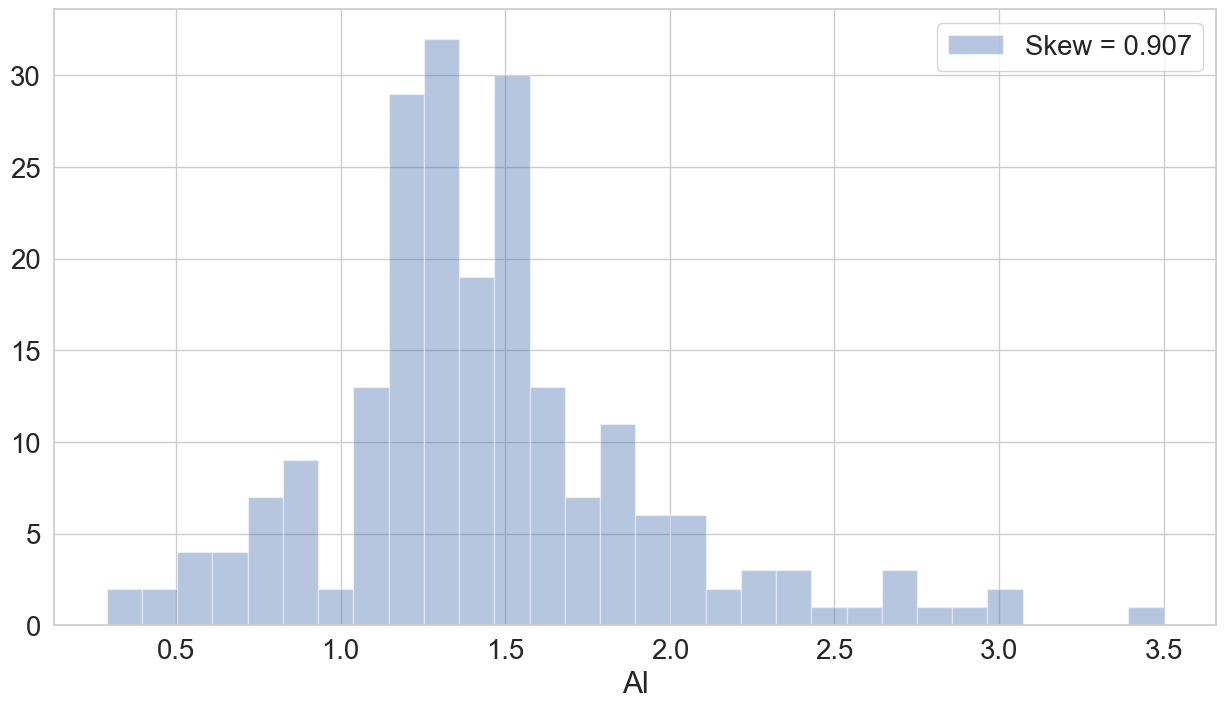

0.9072898090246346


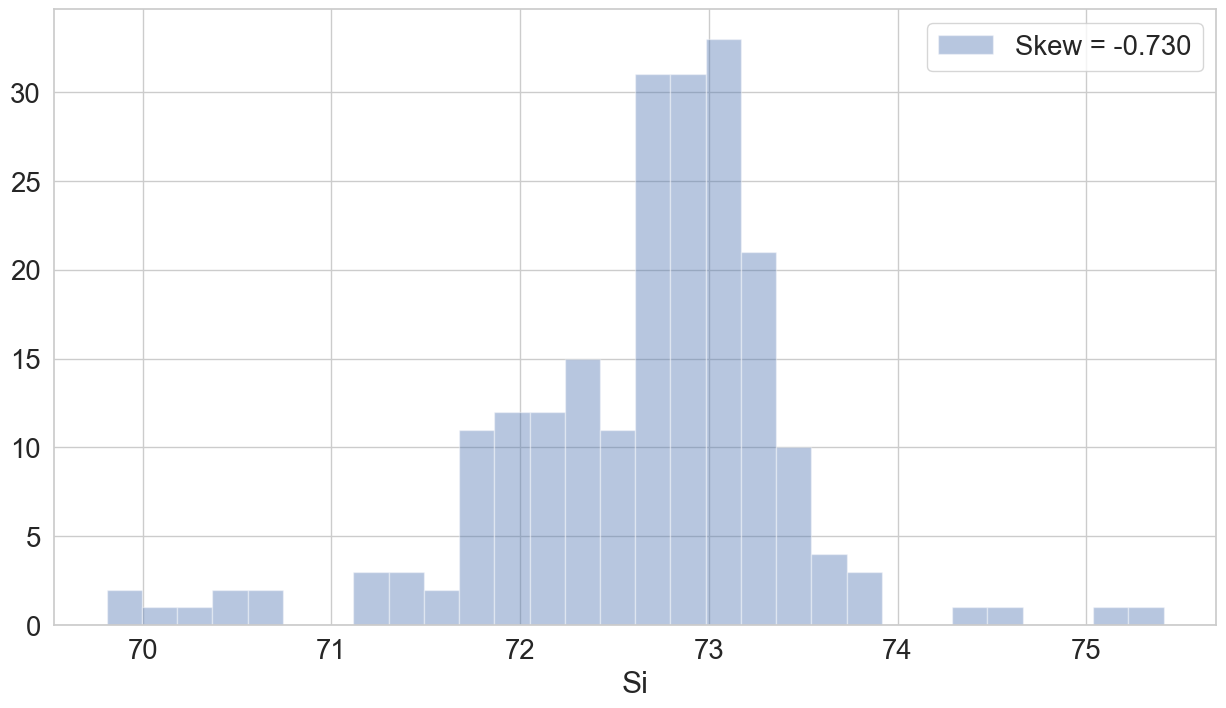

-0.7304472251318588


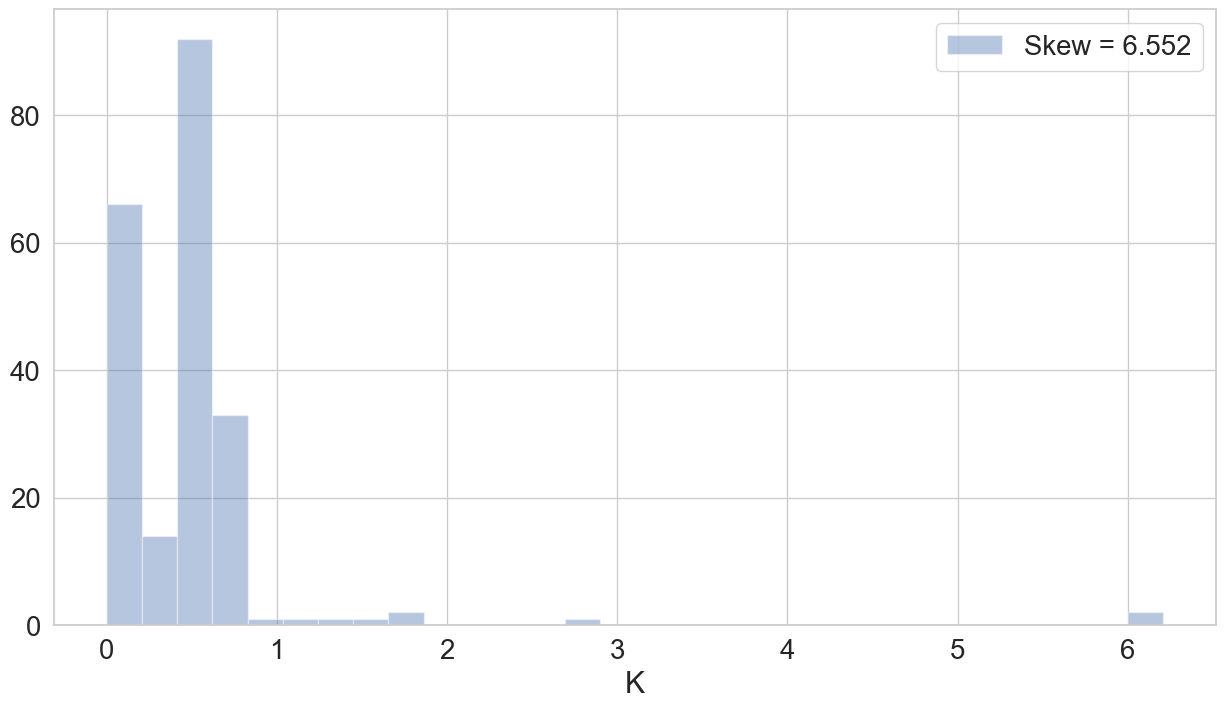

6.55164830960496


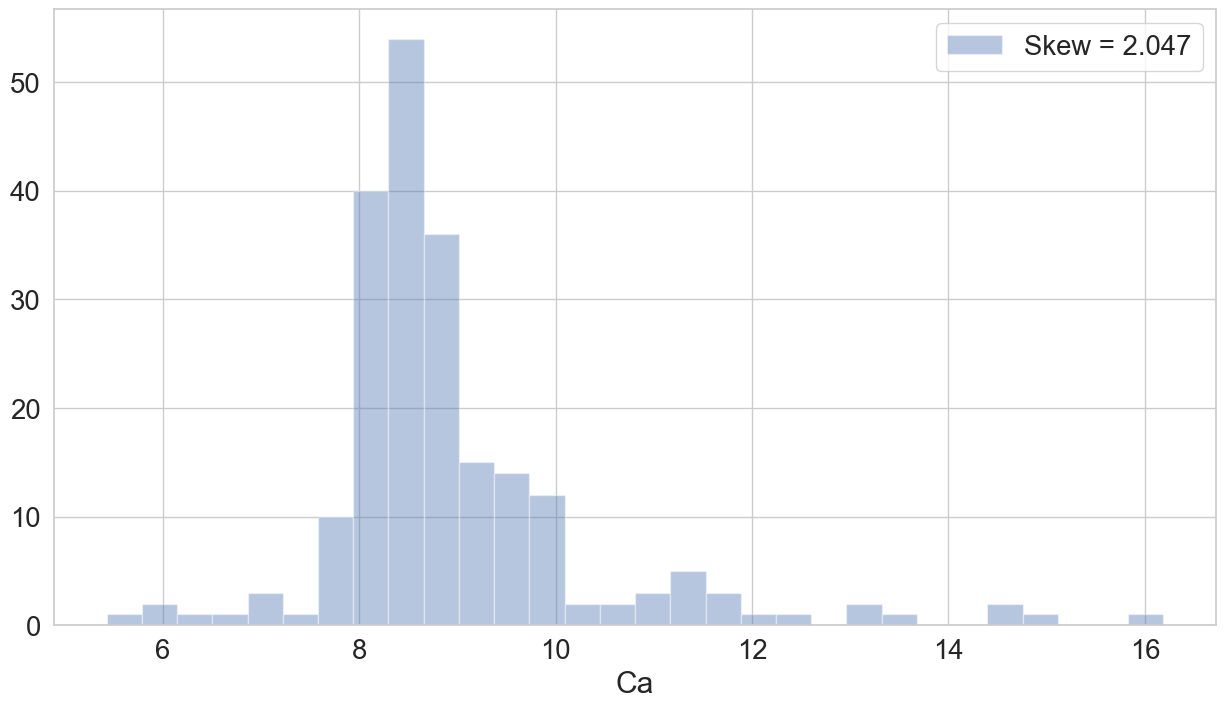

2.0470539131183103


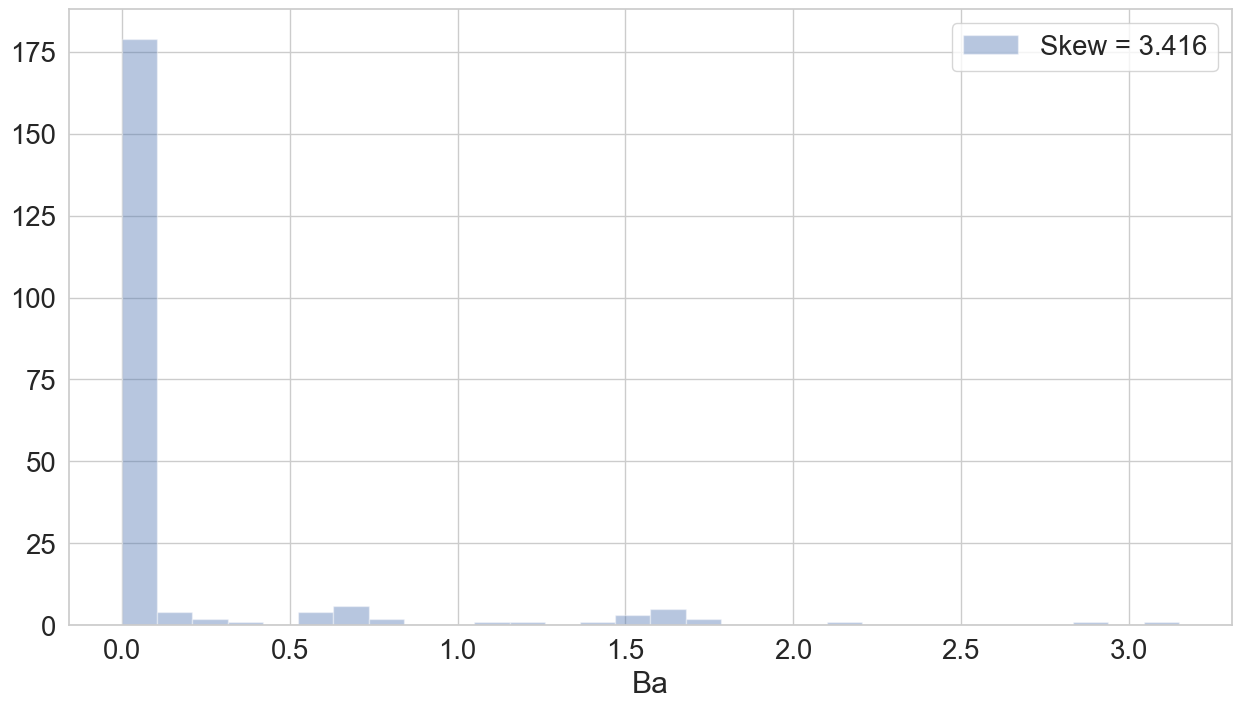

3.4164245693025577


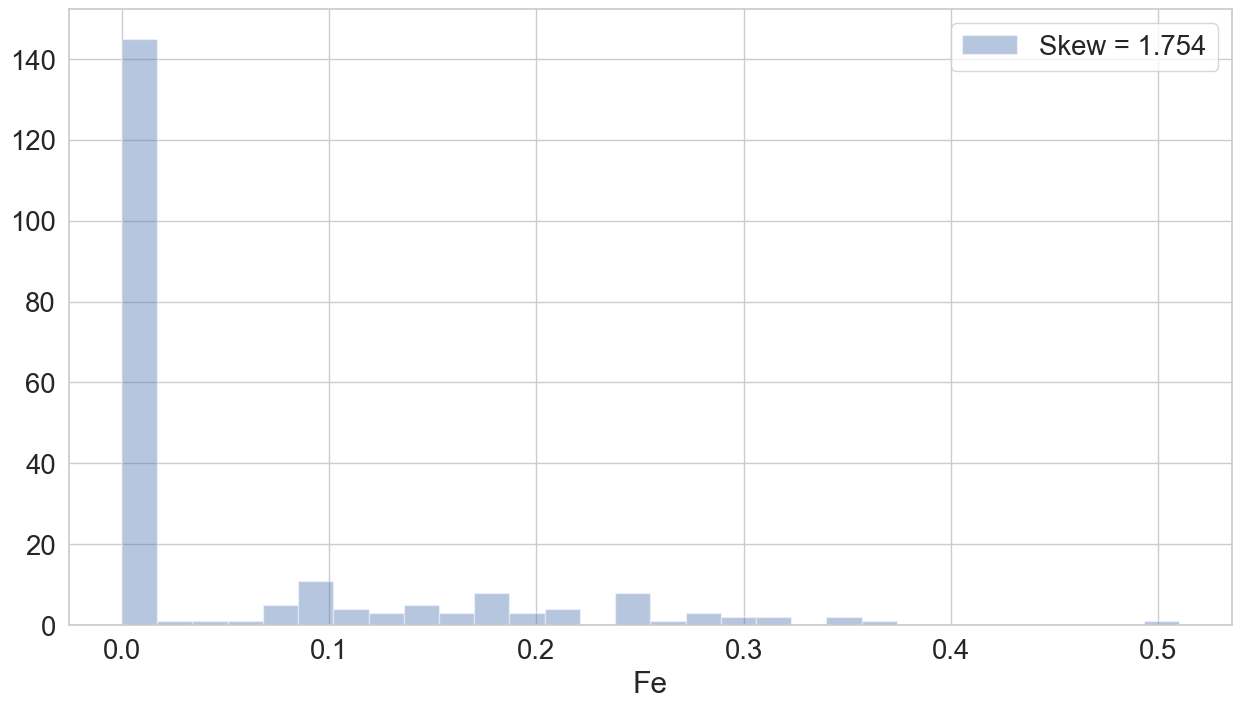

1.754327470435831


In [79]:
#attempting to understand the data more
for i in features:
    skew = glass[i].skew()
    sns.distplot(glass[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
    print(skew)

We can see the evaluated Skew values of our Columns from the above graph and same can be estimated from the skew method also

In [80]:
glass.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Type_Glass    1.114915
dtype: float64

Which give a statistiacl values of SKEW what we found in the graphs
### Outcomes

    1. The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.
    2. The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).
    3. None of the features follow Normal Distribution (are not normally distributed).

### Multivariant Graphical Analysis

<BarContainer object of 214 artists>

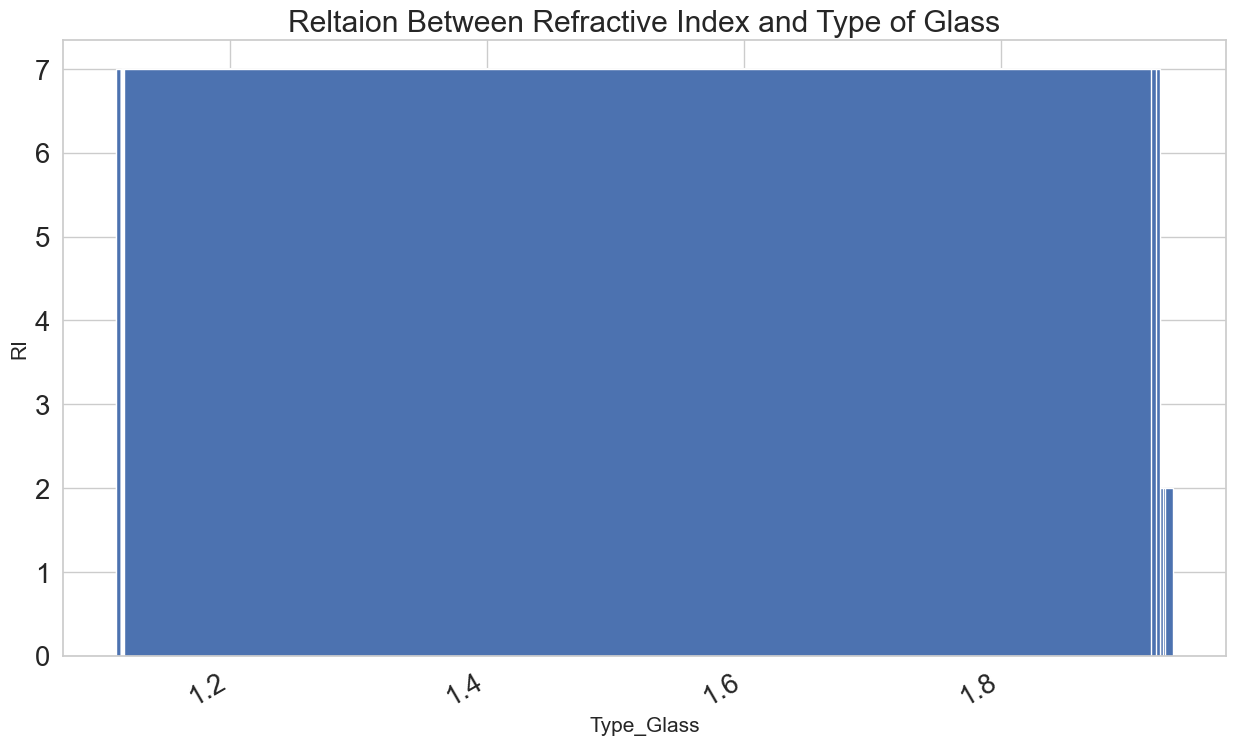

In [83]:
plt.rcParams['figure.figsize']=(15,8)
plt.title('Reltaion Between Refractive Index and Type of Glass')
plt.xlabel('Type_Glass', fontsize='15')
plt.ylabel('RI', fontsize='15')
plt.xticks(rotation =30, ha='right')
plt.bar(glass.RI,glass.Type_Glass)

<Figure size 800x800 with 0 Axes>

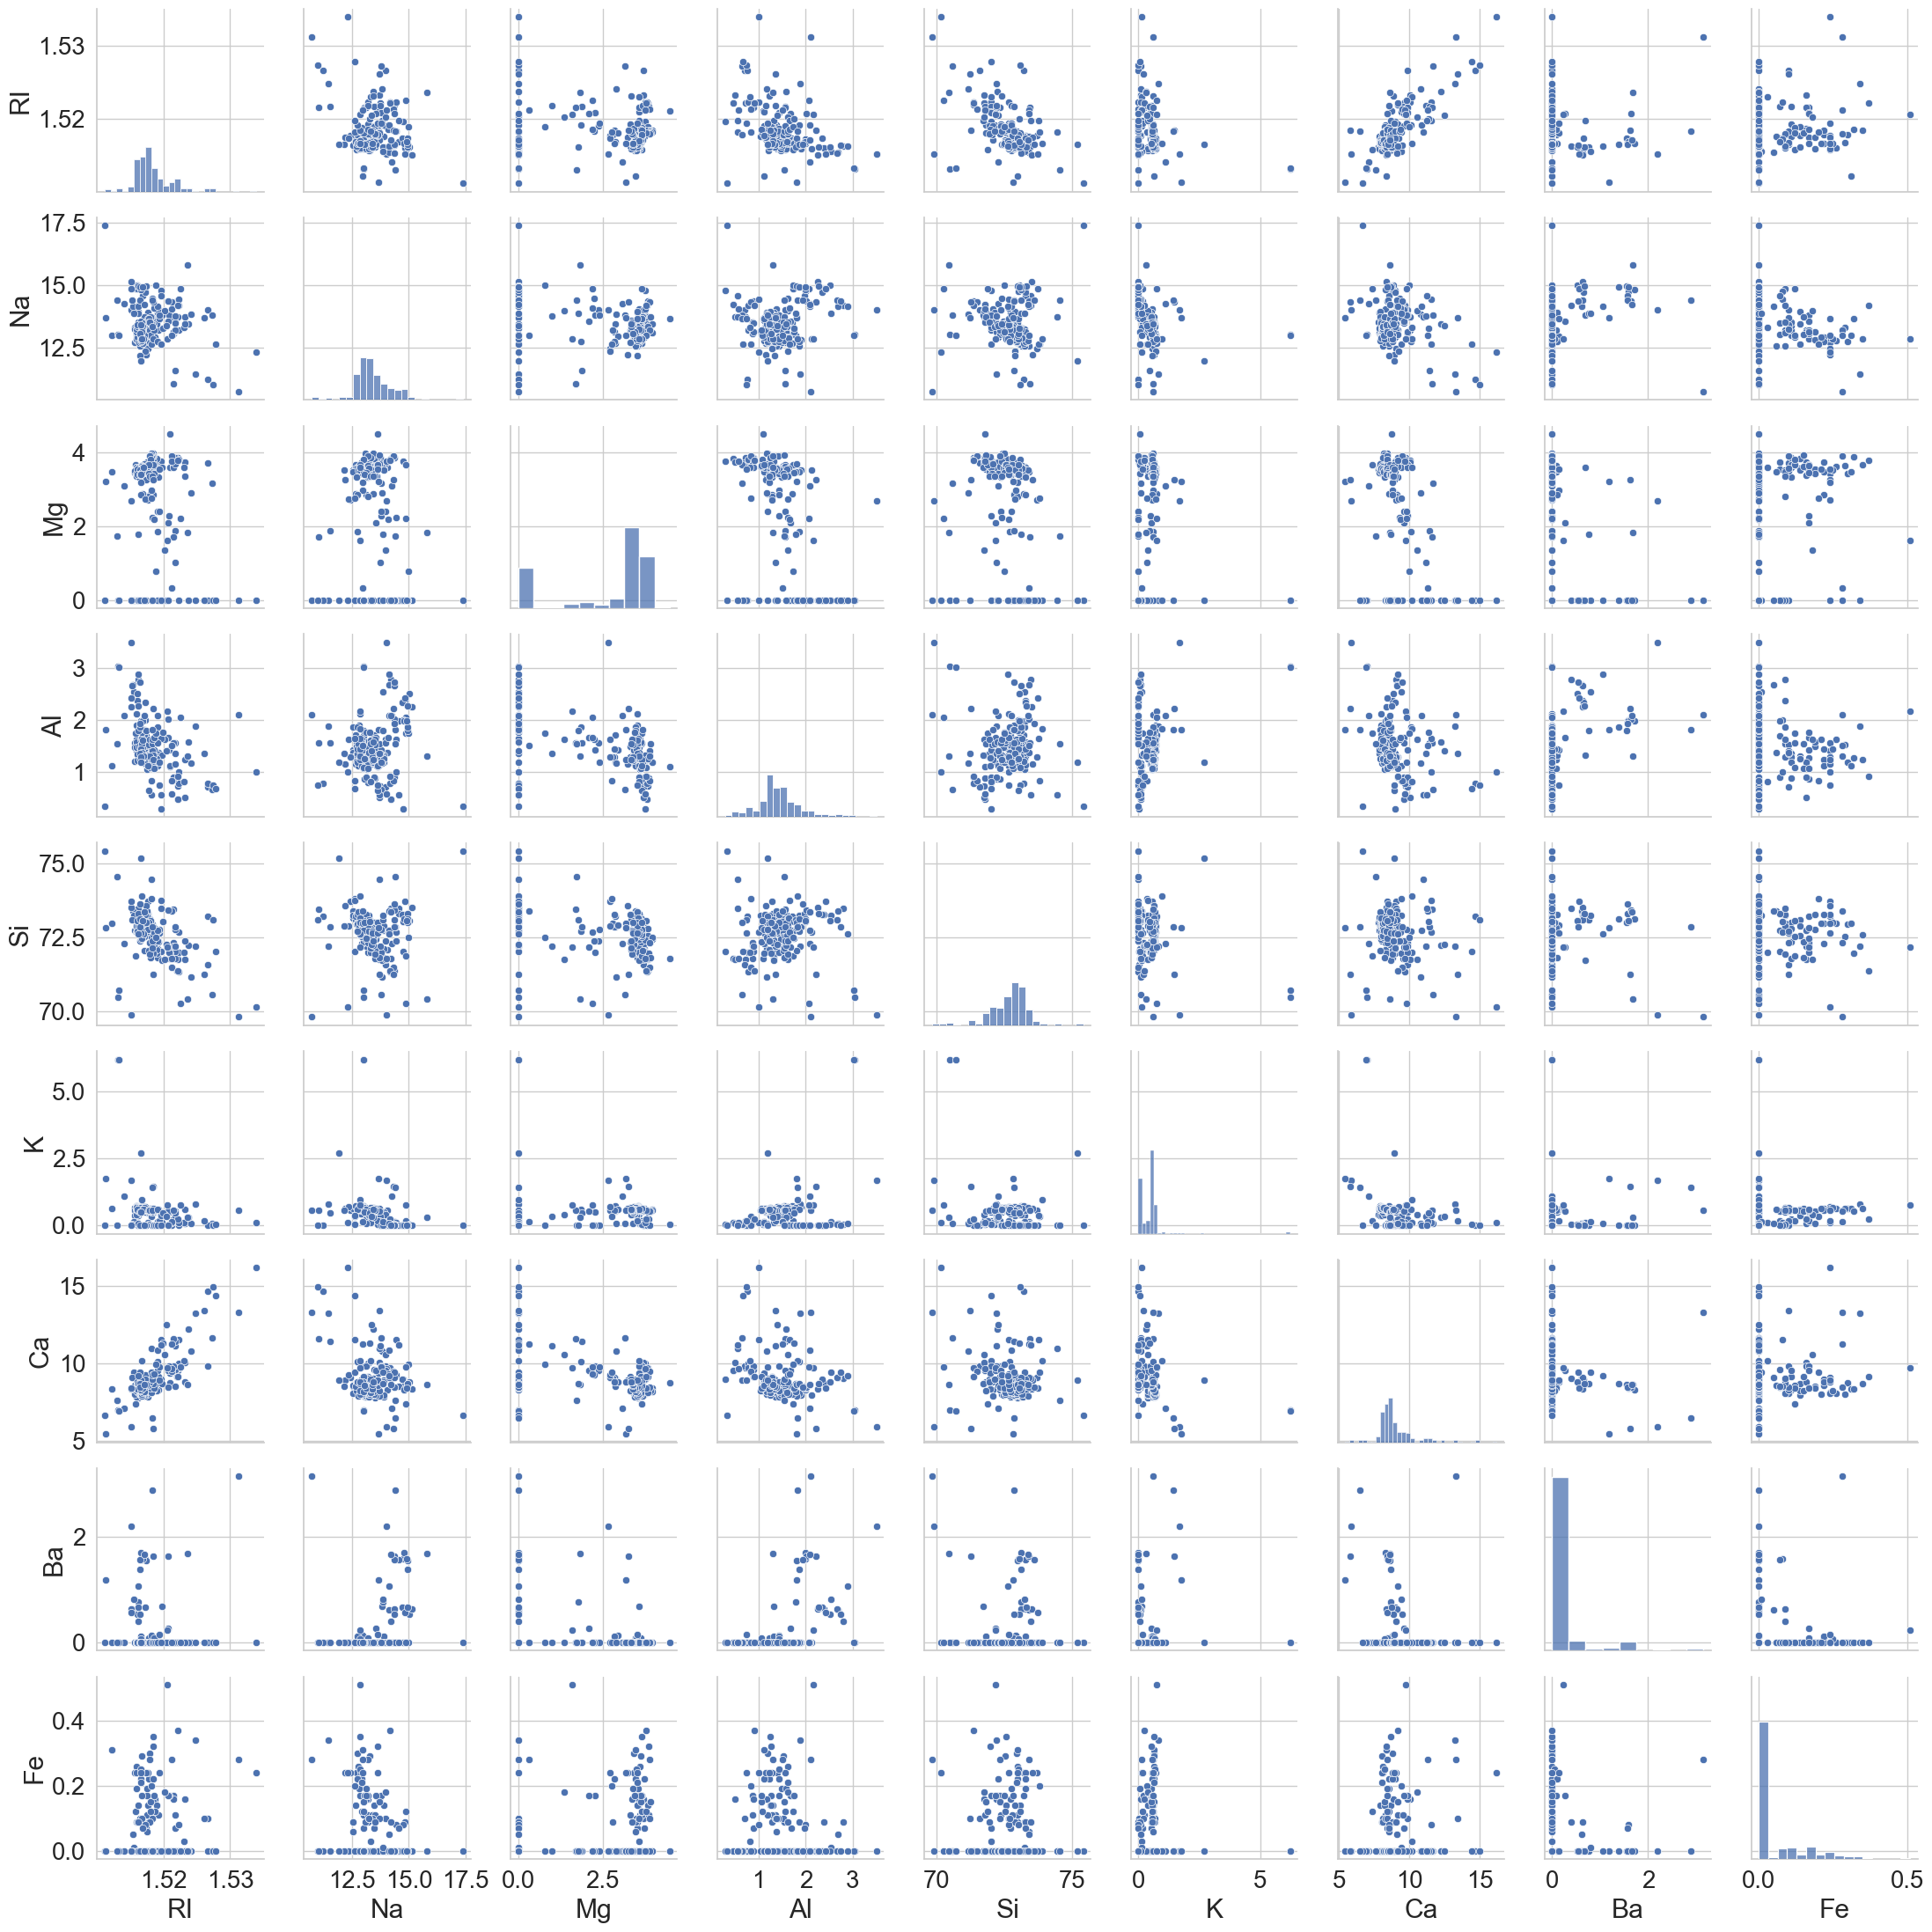

In [85]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

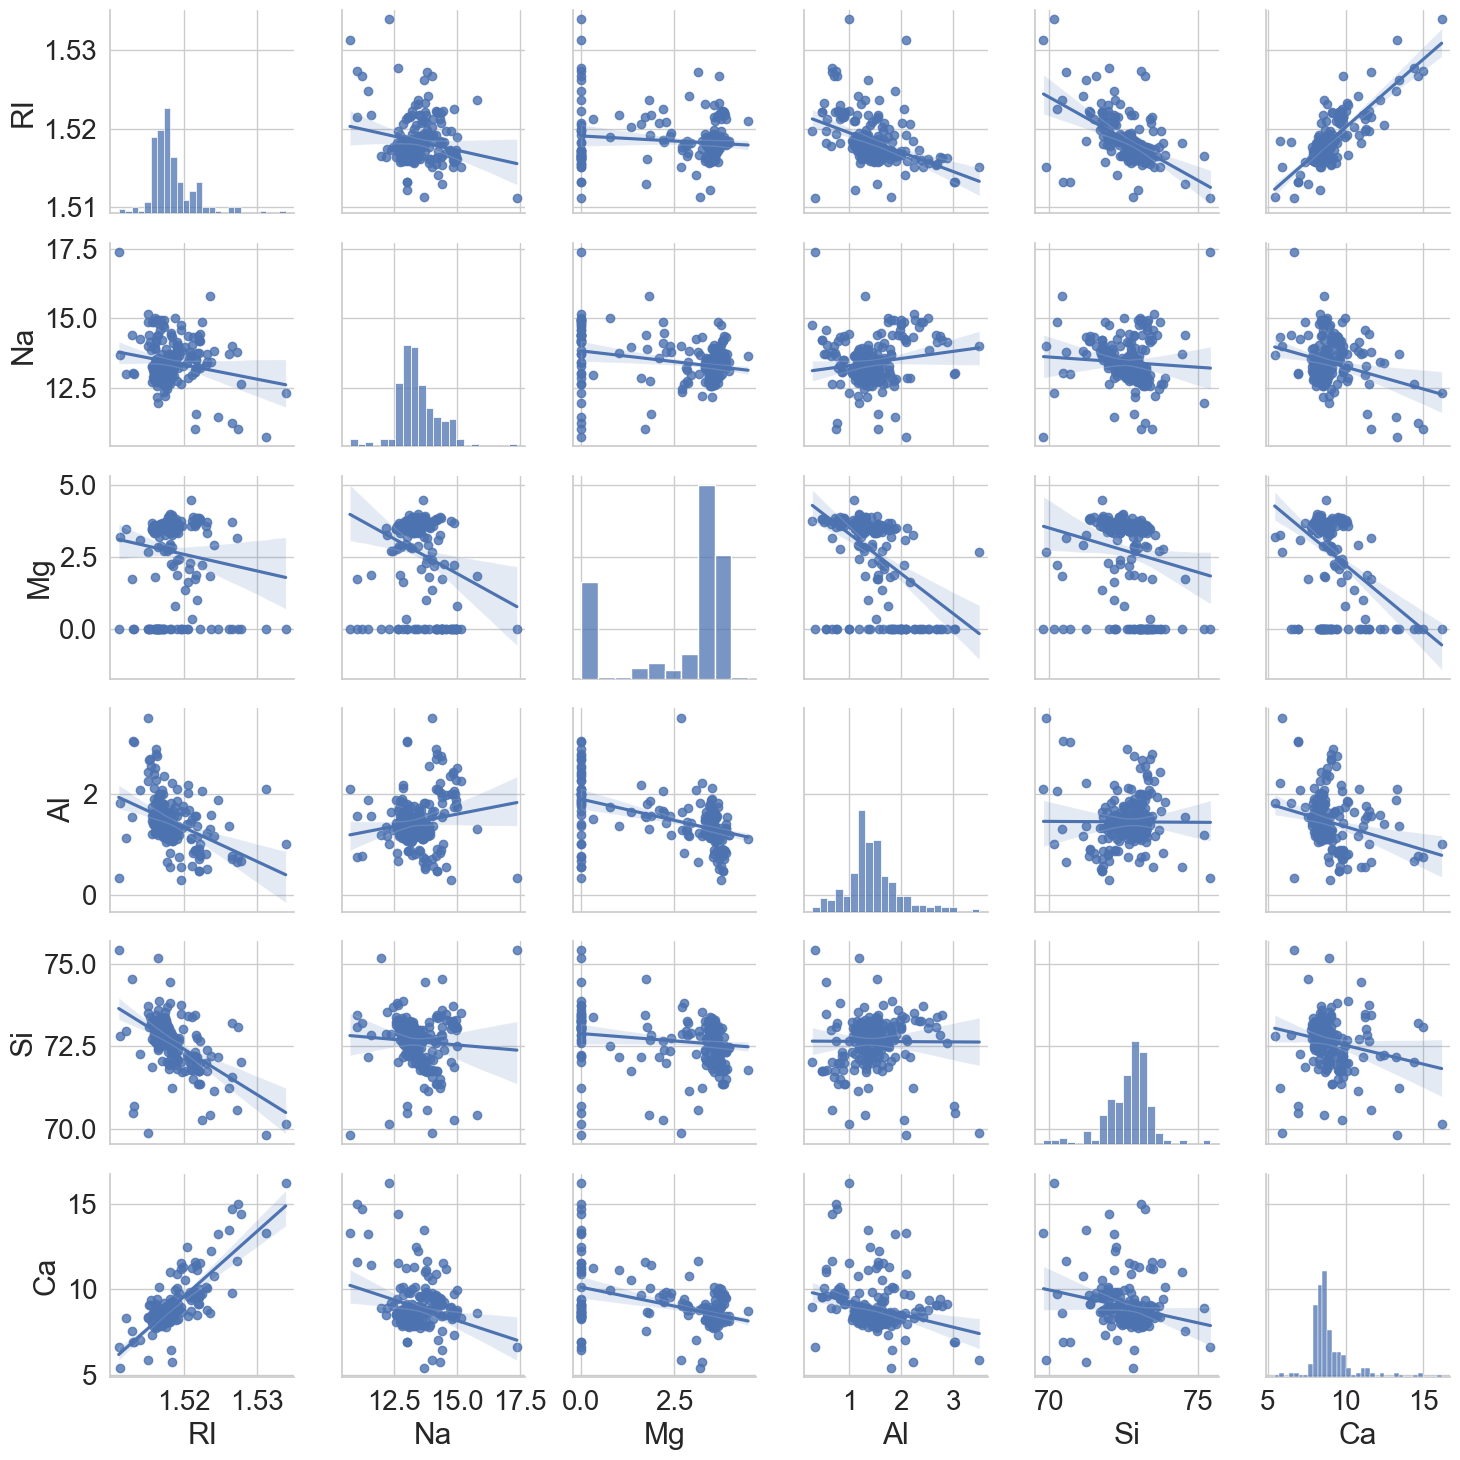

In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

The points are dispersed on the majority of dimensions. But it is evident that calcium and refractive index have a substantial link. RI and silica appear to be antagonistic to one another. 

Types 1, 2, and 3 have many characteristics. However, we can tell them apart based on whether or not they are flat. In essence, the glass is flattened into sheets via the float process. Let's examine the density map for flat versus non-flat glass on a few of the attributes.

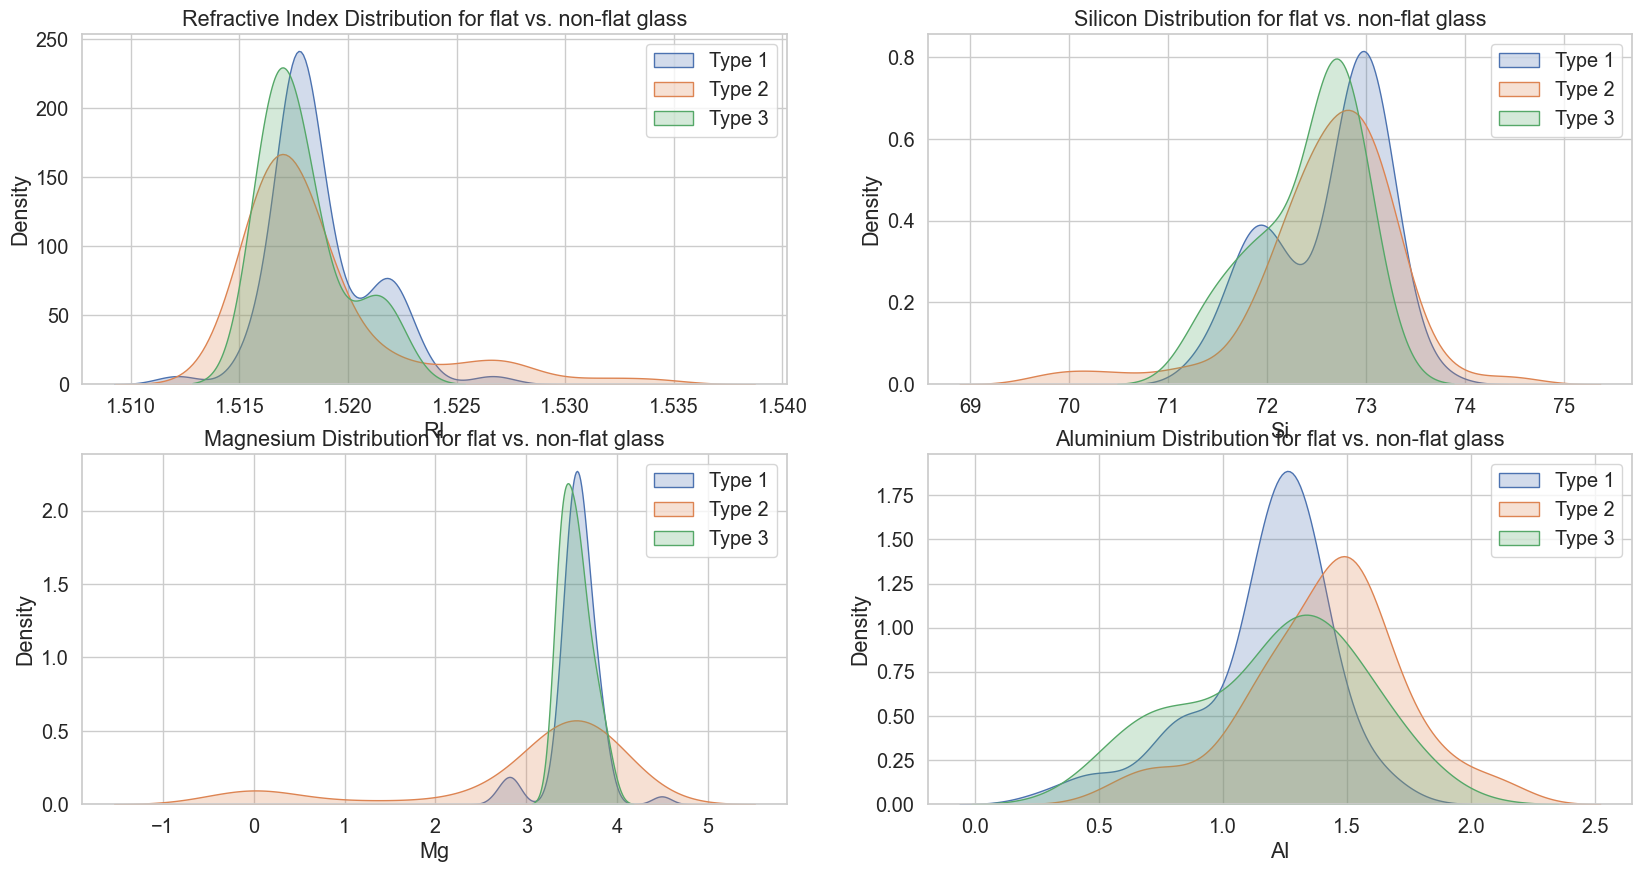

In [88]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass["RI"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["RI"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["RI"][glass.Type_Glass == 3], shade = True)
plt.title("Refractive Index Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass["Si"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Si"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Si"][glass.Type_Glass == 3], shade = True)
plt.title("Silicon Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Mg"][glass.Type_Glass == 3], shade = True)
plt.title("Magnesium Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass["Al"][glass.Type_Glass == 1], shade = True)
sns.kdeplot(glass["Al"][glass.Type_Glass == 2], shade = True)
sns.kdeplot(glass["Al"][glass.Type_Glass == 3], shade = True)
plt.title("Aluminium Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

With the exception of Aluminium, all of the flat ones (1,3) overlap. Type 3 aluminium has a larger range than Type 1 aluminium. The non-float glass, type 2, has a very wide range due to the numerous extreme points. 

### Let's FIndout the CORRELATION among the data set

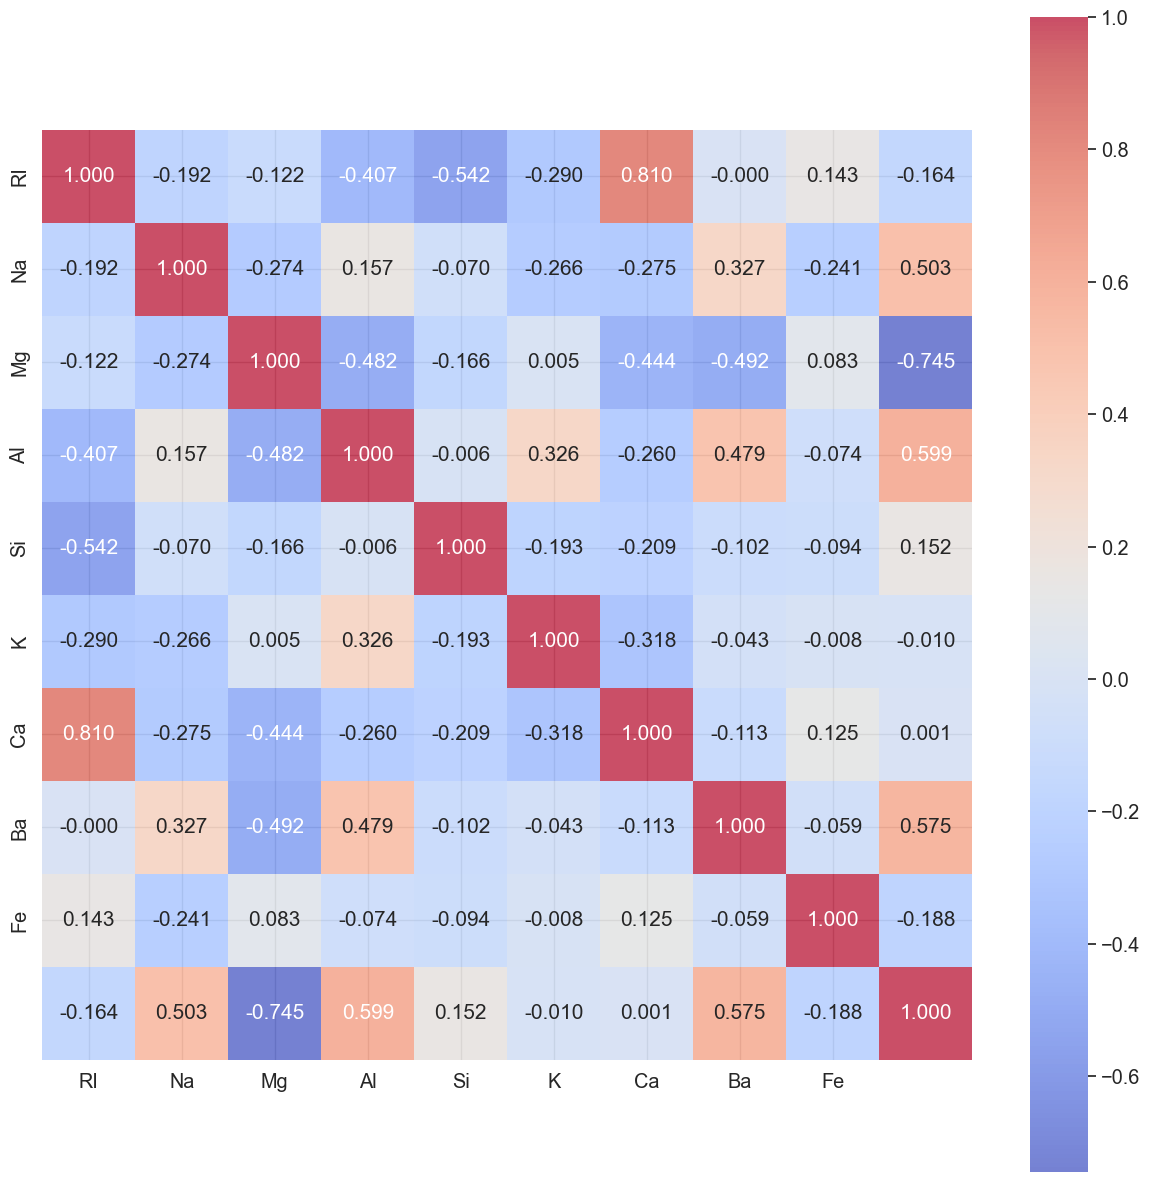

In [93]:
cor= glass.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cbar=True, square=True, annot=True, fmt='.3f', annot_kws={'size': 15}, xticklabels=features, yticklabels=features, alpha=0.7, cmap= 'coolwarm')
plt.show()

**Outcomes** 

1. There is a moderate association between AI and Ba.
2. There is a significant link between RI and Ca. (This might indicate that it's time to run a PCA to decorrelate some of the input features.)

As seen in the pairplot, RI and Ca have a high positive correlation, and Si and RI, negative. But since this is a classification technique and not regression, we cannot simply remove the collinear variables from the model, as they might be able to explain the difference between the target labels. 

Let us look at a powerful method called Principal component analysis to decide on the candidate variables. This is valuable as it can help in dimension reduction and lower the cost of data collection.

Text(0, 0.5, 'Aluminium')

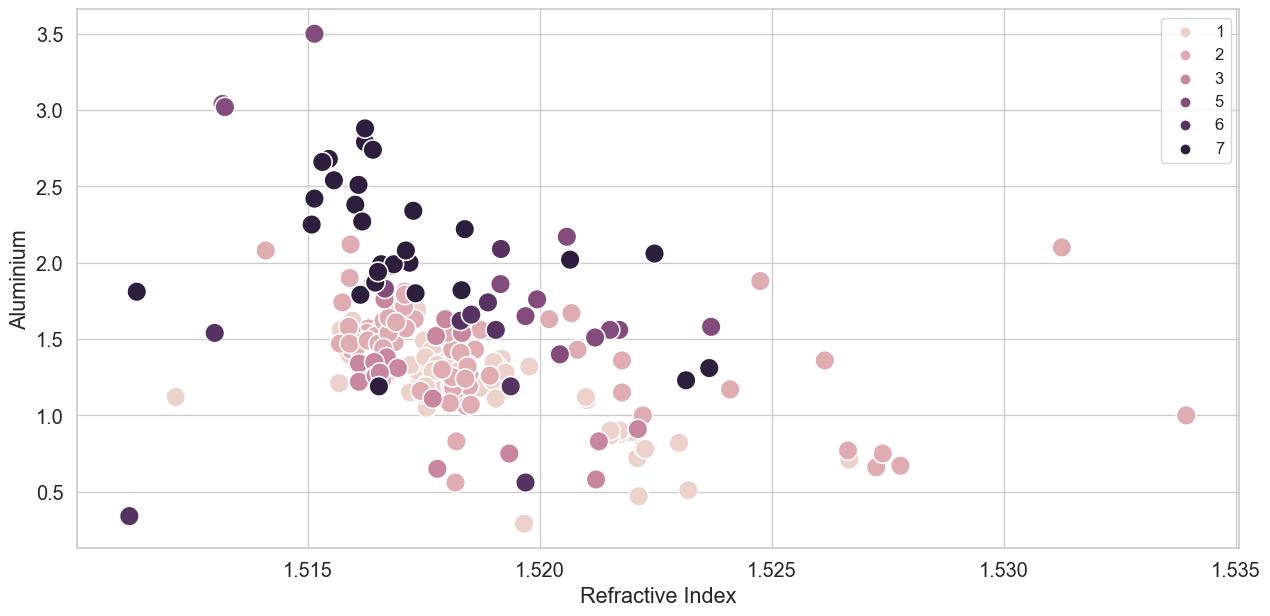

In [95]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Al, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Aluminium')

Text(0, 0.5, 'Sodium')

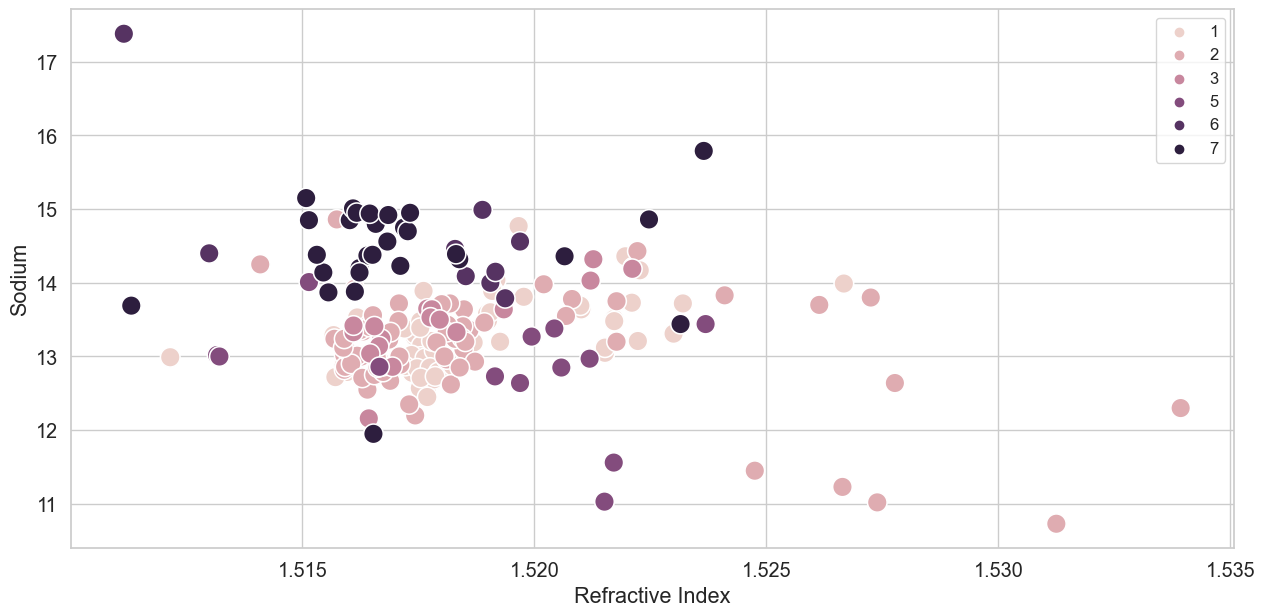

In [96]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Na, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Sodium')

Text(0, 0.5, 'Magnesium')

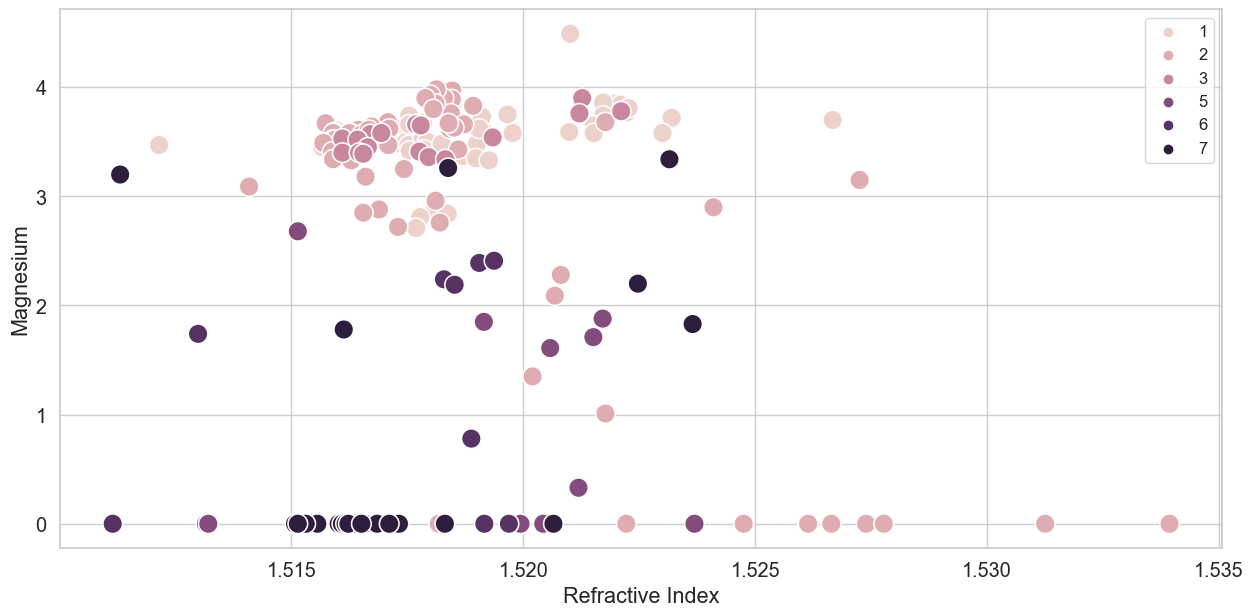

In [97]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Mg, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Magnesium')

Text(0, 0.5, 'Silicon')

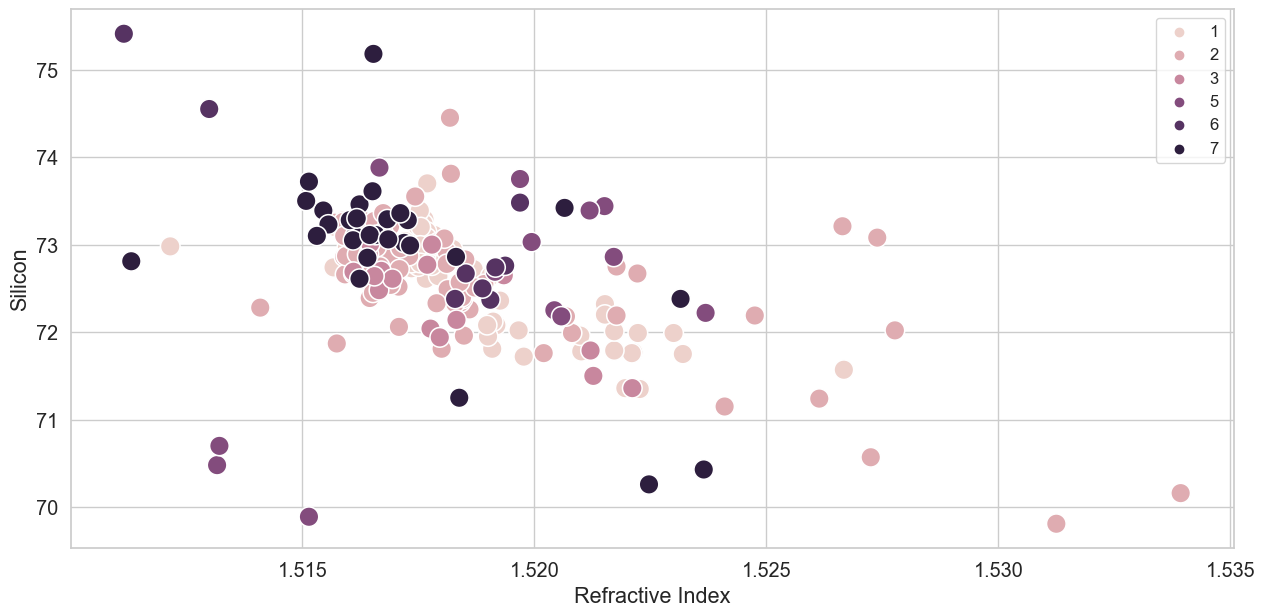

In [98]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Si, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Silicon')

Text(0, 0.5, 'Potassium')

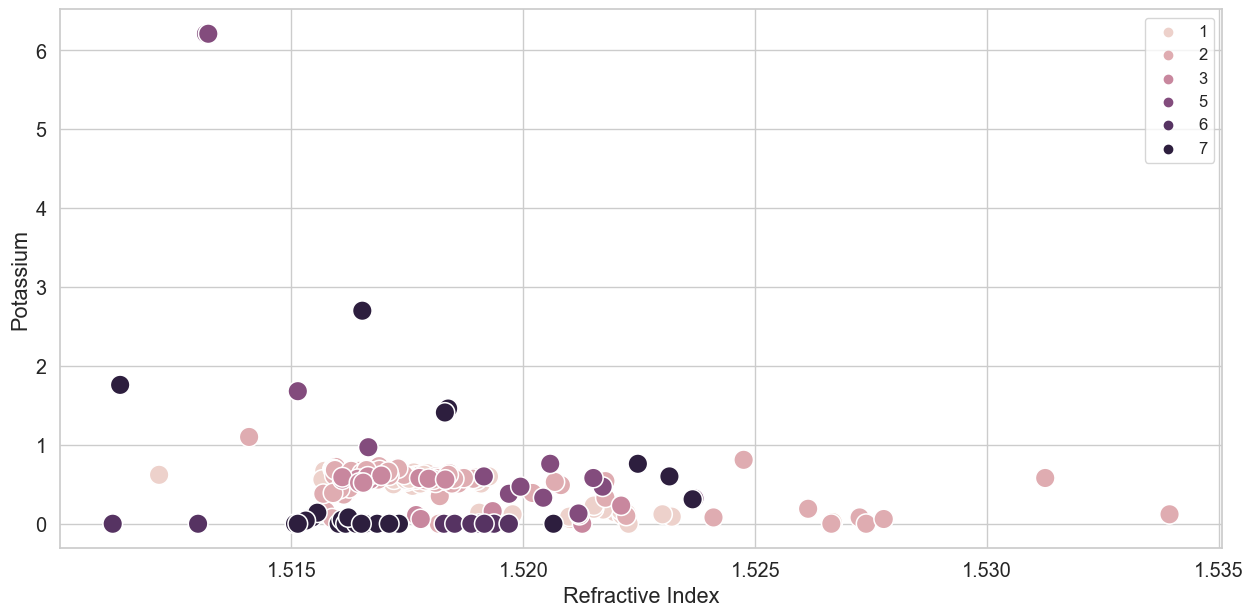

In [99]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.K, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Potassium')

Text(0, 0.5, 'Calcium')

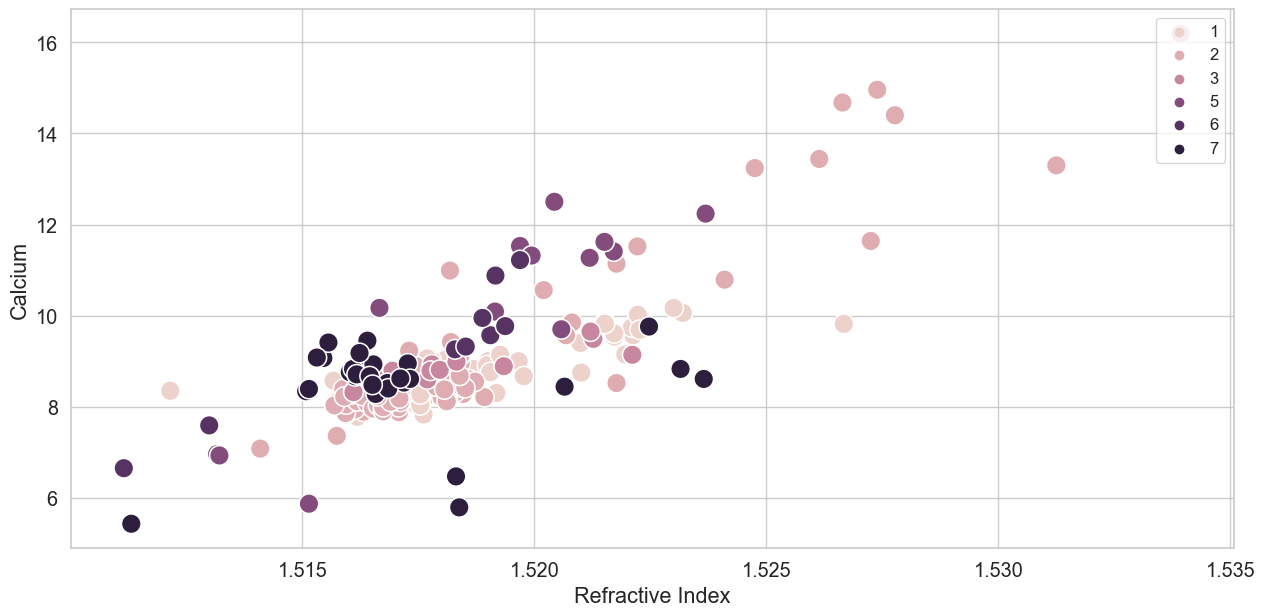

In [100]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Ca, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Calcium')

Text(0, 0.5, 'Barium')

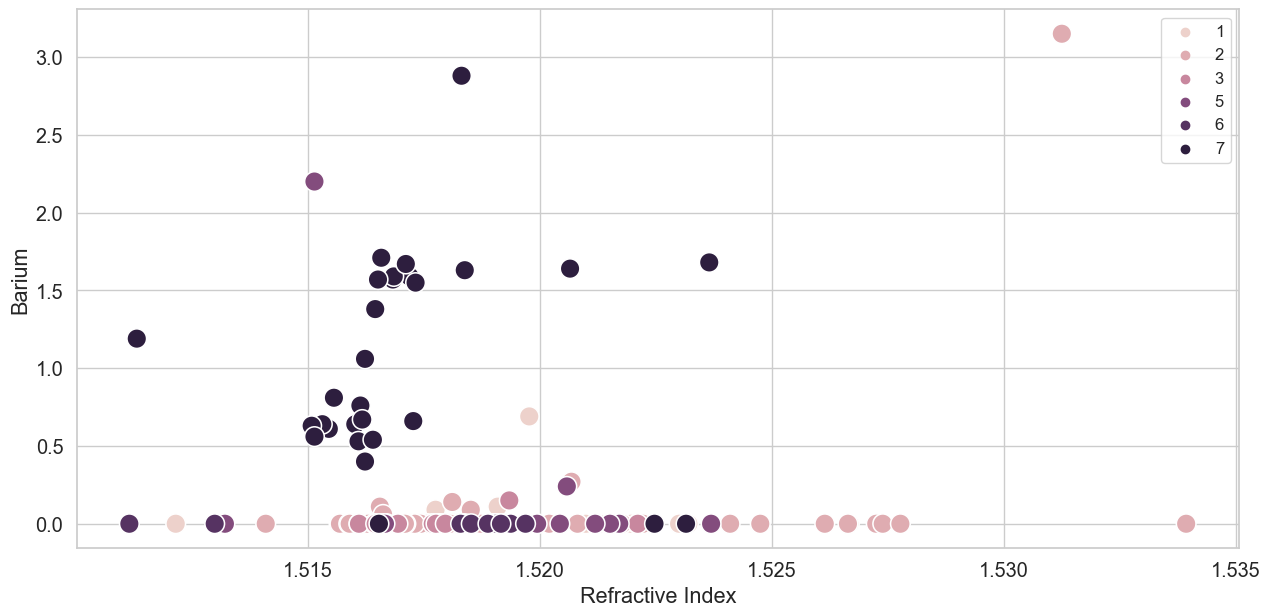

In [101]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Ba, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Barium')

Text(0, 0.5, 'Iron')

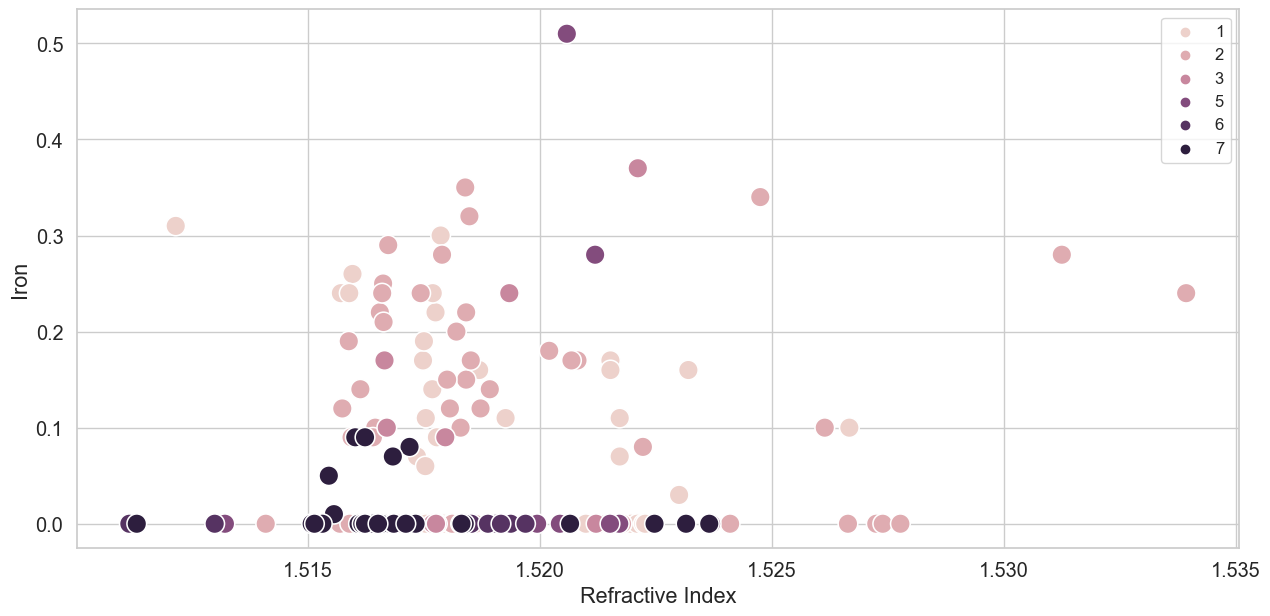

In [102]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=glass.RI, y=glass.Fe, hue=glass.Type_Glass, s=200)
plt.legend(loc = 'upper right', fontsize=12)
plt.xlabel('Refractive Index')
plt.ylabel('Iron')

The Above all Scatterplots are showing the variation of different Glass Types with respect to the variation of Refractive Index with reference to the change in all other chemical compositions

### Let's Go For Detecting OUTLIERS

In [92]:
# Detect observations with more than one outlier
import numpy as np
from collections import Counter
def outlier_hunt(glass):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []   
    for col in glass.columns.tolist():
        Q1 = np.percentile(glass[col], 25)
        Q3 = np.percentile(glass[col],75)      
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = glass[(glass[col] < Q1 - outlier_step) | (glass[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )    
    return multiple_outliers   
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features]))))   

The dataset contains 14 observations with more than 2 outliers


**Outcomes** 

1. There are 14 observations with multiple outliers in our data, on average.
2. These might reduce how effectively our learning algorithms work. Now we'll get rid of them.

### We Can Check the Outliers with the help of BOX PLOTS also

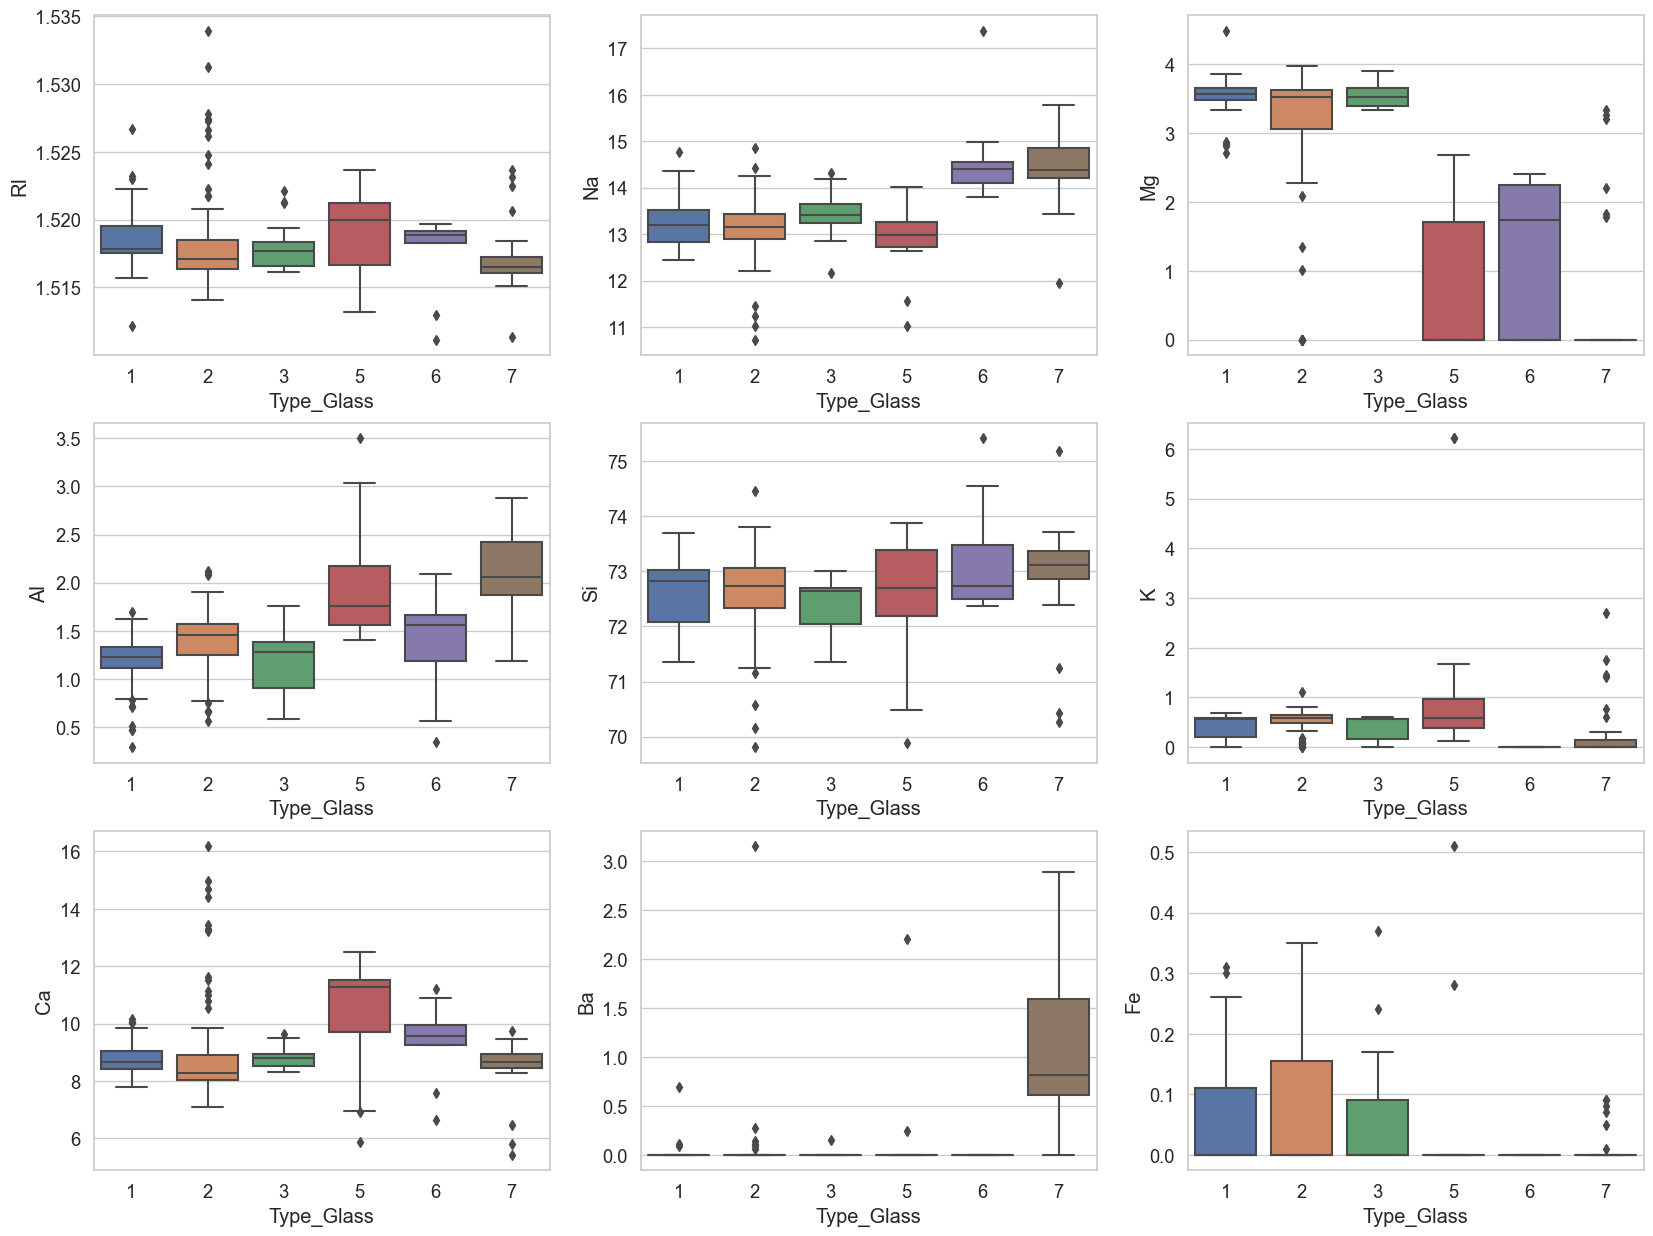

In [104]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type_Glass', y='RI', data=glass)
plt.subplot(3,3,2)
sns.boxplot(x='Type_Glass', y='Na', data=glass)
plt.subplot(3,3,3)
sns.boxplot(x='Type_Glass', y='Mg', data=glass)
plt.subplot(3,3,4)
sns.boxplot(x='Type_Glass', y='Al', data=glass)
plt.subplot(3,3,5)
sns.boxplot(x='Type_Glass', y='Si', data=glass)
plt.subplot(3,3,6)
sns.boxplot(x='Type_Glass', y='K', data=glass)
plt.subplot(3,3,7)
sns.boxplot(x='Type_Glass', y='Ca', data=glass)
plt.subplot(3,3,8)
sns.boxplot(x='Type_Glass', y='Ba', data=glass)
plt.subplot(3,3,9)
sns.boxplot(x='Type_Glass', y='Fe', data=glass)
plt.show()

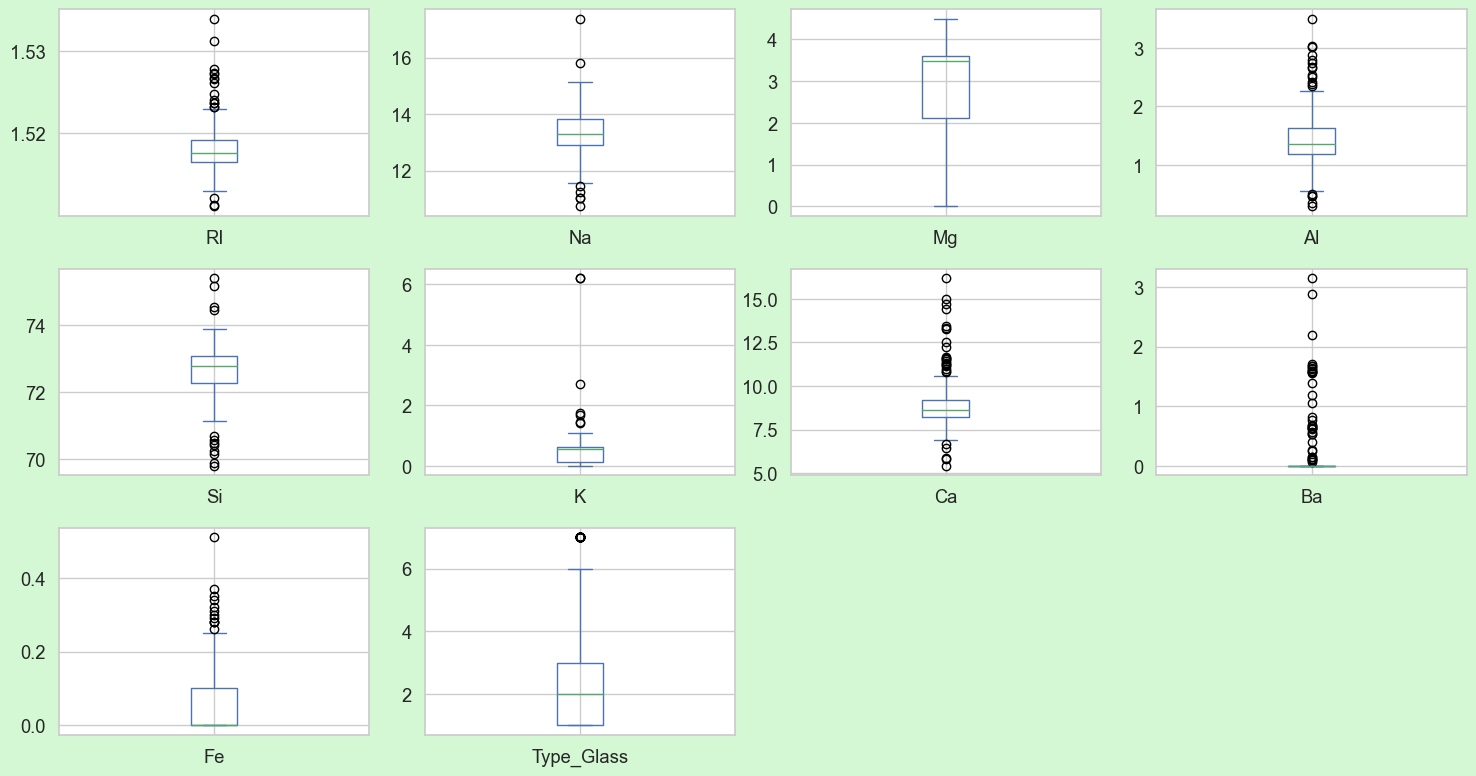

In [106]:
#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='#D3F8D3'
glass.plot(kind ='box', subplots = True, layout=(3,4))
plt.tight_layout()

The box plot demonstrates that the average Refractive index for all types is comparable. 
    Type 5 has a larger range and a little higher mean, though. 
    Types 6 and 7 have increased sodium level, while Types 1 through 3 have relatively high magnesium content. 
    Type 5 and 7 have increased aluminium content. 
    Since silica has the largest concentration of all the minerals yet a broad range for all varieties, it does not offer much differentiation information. 
    
    Additionally, potassium doesn't offer much insight. But because K is utilised in toughened glass, which is used to produce pyrex goods, it is higher in type 5 containers. 
    Type 5 has the highest levels of calcium and type 7 of barium. Despite the fact that iron is present in really small amounts, type 1, 2 and 3 have higher values for specific glasses than the rest. This is due to iron being mostly added to coloured glasses.


    We have a better understanding of the characteristics that help distinguish one type from another. Let's now examine each of their relationships using a pairplot. (Due to their low concentration, K, Ba, and Fe will be omitted.)

                     E1    E2    E3    E4    E5   E6    E7   E8   E9
Presented_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


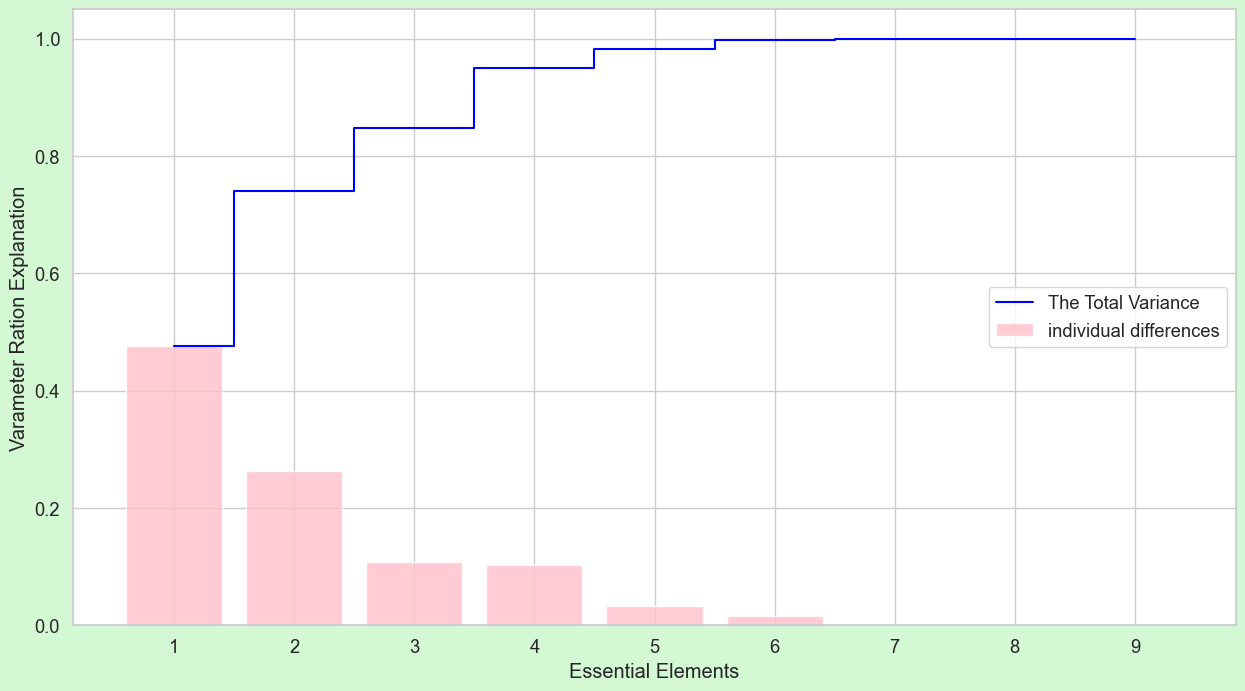

In [114]:
from sklearn.decomposition import PCA
# Performing PCA
X_variables = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_variables)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["E" + str(i) for i in range(1,10)],
                      columns=["Presented_Variance"])
print(var_df.T)
plt.figure(figsize=(15,8))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual differences', color='pink', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'The Total Variance', color='blue')
plt.ylabel('Varameter Ration Explanation')
plt.xlabel('Essential Elements')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

A little more than 99% of the total explained variance is explained by the first 5 components. We can only rerun the analysis using these five elements.

In [117]:
pca_red = PCA(n_components=5)
X_red = pca_red.fit_transform(X_variables)

Let's move on to model development now that we have our characteristics and target labels.

## Development of the Model

In [121]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [122]:
# Distinguishing the explanatory (x) and response (y) variables
X = X_red
y = glass["Type_Glass"].values

In [123]:
# Using 70% of the sample for model training and the remaining 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Verify that all glass kinds are represented in the train and test.
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


### Testing potential models

In [125]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)
 

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [126]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.17344616 0.38290317 0.17939299 0.22734685 0.03691083]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]
[0.3352693  0.28759977 0.13390681 0.17182611 0.07139801]


In [127]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.753846
1,Gradient Boost,0.676923
2,Decision Tree,0.646154
3,Random Forest,0.738462


The maximum accuracy is provided by SVM, and all of the features from the other models appear to be significant. As a result, SVM will remain our chosen model, and hyperparameter adjustment will be used to enhance it.

## Hyperparameter Tuning

In [128]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


## Operating the Final Model

In [143]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

## Model Performance

Text(270.25, 0.5, 'anticipated label')

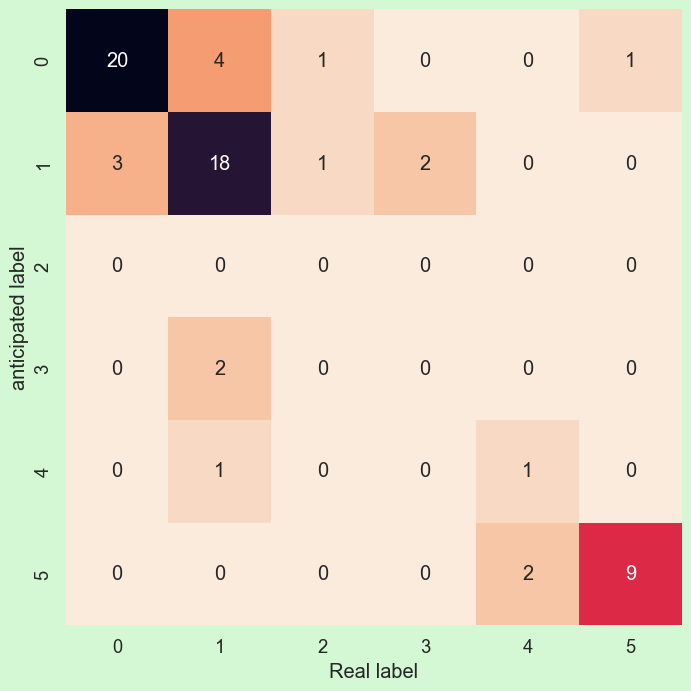

In [141]:
# Now, visualise the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='rocket_r')
plt.xlabel('Real label')
plt.ylabel('anticipated label')

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82        23
           2       0.75      0.72      0.73        25
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.50      0.33      0.40         3
           7       0.82      0.90      0.86        10

    accuracy                           0.74        65
   macro avg       0.47      0.47      0.47        65
weighted avg       0.71      0.74      0.72        65



At this point, I provide an **interactive component that allows the user to experiment with the model**. The first stage is to retrain the model using the complete dataset, the top-performing model, and the above-mentioned parameters. The user is then shown interactive sliders with ranges that are appropriate for the distribution of the original dataset. The output is displayed below the sliders and represents the final anticipated class of the glass. To determine which kind it belongs to, the user can look at the table above the sliders.

In [145]:
# Given that cross-validation has already been done, train the model using the whole set of data.
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_variables.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [146]:
# When the slider values are modified, this function will be called.
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [147]:
# Modify the slider's values.
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>

## Reference Scale for the Type of Glass

    1- building_windows_float_processed
    2- building_windows_non_float_processed
    3- vehicle_windows_float_processed
    4- vehicle_windows_non_float_processed (none in this database)
    5- containers
    6- tableware
    7- headlamps


# Thank You